In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yt
import trident
import chollaread
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.colors as colors
import colorcet as cc
from matplotlib.cm import get_cmap
from astropy.constants import M_sun
import matplotlib.axes

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:768: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [2]:
ds = chollaread.load('/Users/sofimar/Desktop/Summer Research/140.h5.0',cell_size_cgs=(10/256)*chollaread.kpc)

yt : [INFO     ] 2022-06-27 14:07:41,668 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-06-27 14:07:41,669 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2022-06-27 14:07:41,673 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-27 14:07:41,673 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22]
yt : [INFO     ] 2022-06-27 14:07:41,673 Parameters: cosmological_simulation   = 0.0


In [3]:
def make_ray(x0, y0, z0, x, y, z, num):
    
    k = (3.086E+21)*10 # Code length
    
    ray_start = np.array([x0,y0,z0])*k
    ray_end = np.array([x,y,z])*k
    
    ray = trident.make_simple_ray(ds,
                                 start_position=ray_start,
                                 end_position=ray_end,
                                 data_filename= 'ray_'+str(num)+'.h5',
                                 lines='all',
                                 ftype='gas')
    return ray

In [4]:
def spec(ray_, lmin, lmax,ins, num, dlam=0.001, dlam2=0.00997,col='deeppink', line=None, 
             el=None, rom_num=None, lrest=None, gamma=None, f_value=None, DIY=False):
    
    # Make array of rays
    k = (3.086E+21)*10 # Code length
    cu = 1/256
    
    arrays = []
    

    ray = ray_

    sg = trident.SpectrumGenerator(lambda_min= lmin, lambda_max= lmax, dlambda=dlam)
    sg2 = trident.SpectrumGenerator(lambda_min= lmin, lambda_max= lmax, dlambda=dlam2)

    if DIY==True:

        DIY_line = el+' '+str(rom_num)+' '+str(int(lrest))
        sg.add_line_to_database(el, rom_num, lrest, gamma,f_value, field=None,
                                identifier=DIY_line)

        sg.make_spectrum(ray, lines=[DIY_line])
        sg.save_spectrum('spec.txt')
        
        sg2.add_line_to_database(el, rom_num, lrest, gamma,f_value, field=None,
                                identifier=DIY_line)

        sg2.make_spectrum(ray, lines=[DIY_line])
        sg2.save_spectrum('spec2.txt')



    else:
        sg.make_spectrum(ray, lines=[line])
        sg.save_spectrum('spec.txt')
        
        sg2.make_spectrum(ray, lines=[line])
        sg2.save_spectrum('spec2.txt')



    f = np.loadtxt('spec.txt')
    lam = f[:,0] # All rows, 1st column
    flux = f[:,2]
    
    f2 = np.loadtxt('spec2.txt')
    lam2 = f2[:,0] # All rows, 1st column
    flux2 = f2[:,2]

    tog = np.array([lam, flux, lam2, flux2])
    arrays.append(tog)
        

        
  
    
    # Average Flux
#     flux_list = []

    
#     flux_ = arrays[1]
#     flux_list.append(flux_) # Append flux to a list
#     flux_arr = np.array(flux_list) # Turn list into an array
#     flux_a = flux_arr.T # Transpose array
        

        
#     reds = get_cmap('cet_CET_L18')
#     colors = reds(np.linspace(0.25,1,6))

    fig = plt.figure(figsize=(15, 5))
    

    plt.step(tog[2], tog[3], color='dimgrey', label=ins, linewidth=2.2, where='mid')
    plt.plot(tog[0], tog[1], color=col, label= 'd$\lambda$= ' +str(dlam), alpha=0.8)
        
    if DIY==False:
        plt.title(line+ ' (Ray ' + num + ')', fontsize=14)
    else:
        plt.title(el+" "+rom_num+" "+str(int(lrest))+ ' (Ray ' + num + ')', 
                  fontsize=14)
    
    plt.xlabel('Wavelength [$\AA$]', fontsize=12)
    plt.ylabel('Relative Flux', fontsize=12)
    plt.legend(fontsize=12)
    plt.xlim(lmin, lmax)

    return arrays

In [5]:
def spec_extra(ray_, lmin, lmax, dlam=0.0803, line=None, 
             el=None, rom_num=None, lrest=None, gamma=None, f_value=None, DIY=False):
    
    # Make array of rays
    k = (3.086E+21)*10 # Code length
    cu = 1/256
    
    arrays = []
    

    ray = ray_

    sg = trident.SpectrumGenerator(lambda_min= lmin, lambda_max= lmax, dlambda=dlam)
    
    if DIY==True:

        DIY_line = el+' '+str(rom_num)+' '+str(int(lrest))
        sg.add_line_to_database(el, rom_num, lrest, gamma,f_value, field=None,
                                identifier=DIY_line)

        sg.make_spectrum(ray, lines=[DIY_line])
        sg.save_spectrum('spec.txt')
        
    


    else:
        sg.make_spectrum(ray, lines=[line])
        sg.save_spectrum('spec.txt')
        



    f = np.loadtxt('spec.txt')
    lam = f[:,0] # All rows, 1st column
    flux = f[:,2]
    
    

    tog = np.array([lam, flux])
    
    return tog

In [6]:
ray1 = make_ray(0.94,0,0.5,0.94,1,0.5, 1)
ray2 = make_ray(1.0528,0,0.518, 1.0528, 1, 0.518, 3)
ray3 = make_ray(1.0833,0,0.478, 1.0833, 1, 0.478, 4)

yt : [INFO     ] 2022-06-27 14:08:05,347 Getting segment at z = 0.0: [0.47 0.   0.25] unitary to [0.47 0.5  0.25] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-06-27 14:08:05,350 Getting subsegment: [0.47 unitary, 0.0 unitary, 0.25 unitary] to [0.47 unitary, 0.5 unitary, 0.25 unitary].
yt : [INFO     ] 2022-06-27 14:08:06,020 Saving field data to yt dataset: ray_1.h5.
yt : [INFO     ] 2022-06-27 14:08:06,112 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-06-27 14:08:06,112 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-06-27 14:08:06,113 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-06-27 14:08:06,113 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 202

# Ly a

yt : [INFO     ] 2022-06-27 14:08:23,621 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:08:23,633 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:08:23,648 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-06-27 14:08:23,653 Identified 1.210e+02 octs
yt : [INFO     ] 2022-06-27 14:08:23,746 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:08:23,759 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 256/256 [00:01<00:00, 142.99it/s] 
yt : [INFO     ] 2022-06-27 14:08:25,585 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2022-06-27 14:08:25,585 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:08:25,685 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 256/256 [00:00<00:00, 804.60it/s] 
yt : [INFO     ] 2022-06-27 14:08:26,035 Not adding continuum Ly C: insufficient co

[array([array([1209.   , 1209.001, 1209.002, ..., 1224.998, 1224.999, 1225.   ]),
        array([0.9909983, 0.9909956, 0.9909929, ..., 1.       , 1.       ,
               1.       ])                                                ,
        array([1209.002, 1209.012, 1209.022, ..., 1224.984, 1224.994, 1225.004]),
        array([0.9945126, 0.994496 , 0.9944794, ..., 0.9971295, 0.9971356,
               0.9971416])                                                ],
       dtype=object)]

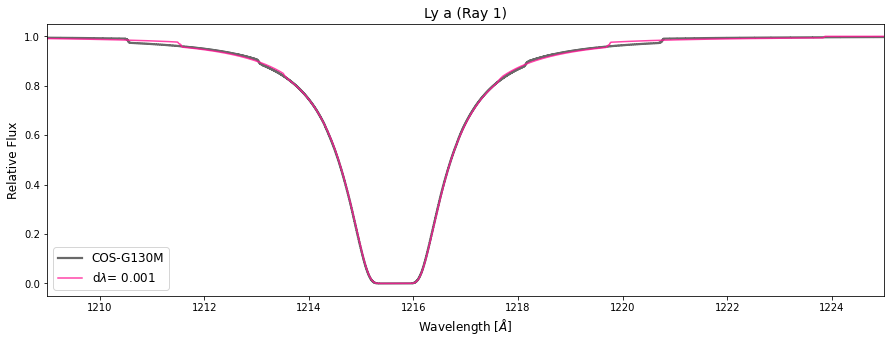

In [7]:
spec(ray_=ray1, lmin=1209, lmax=1225, line='Ly a',ins='COS-G130M', num='1')

yt : [INFO     ] 2022-06-27 14:08:42,845 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:08:42,858 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:08:42,876 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-06-27 14:08:42,882 Identified 1.210e+02 octs
yt : [INFO     ] 2022-06-27 14:08:42,978 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:08:42,983 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 256/256 [00:00<00:00, 548.72it/s] 
yt : [INFO     ] 2022-06-27 14:08:43,483 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2022-06-27 14:08:43,484 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:08:43,589 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2417.77it/s]
yt : [INFO     ] 2022-06-27 14:08:43,727 Not adding continuum Ly C: insufficient co

[array([array([1209.   , 1209.001, 1209.002, ..., 1224.998, 1224.999, 1225.   ]),
        array([0.9964224, 0.9964213, 0.9964202, ..., 1.       , 1.       ,
               1.       ])                                                ,
        array([1209.002, 1209.012, 1209.022, ..., 1224.984, 1224.994, 1225.004]),
        array([0.9972491, 0.9972408, 0.9972325, ..., 0.9985275, 0.9985307,
               0.9985338])                                                ],
       dtype=object)]

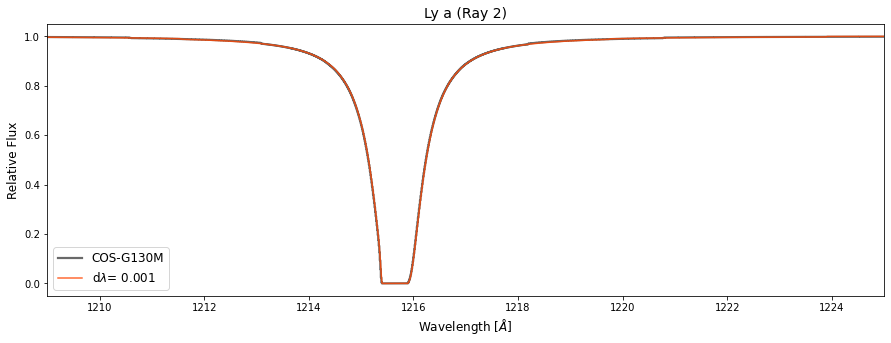

In [8]:
spec(ray_=ray2, lmin=1209, lmax=1225, line='Ly a',ins='COS-G130M', num='2', col='orangered')

yt : [INFO     ] 2022-06-27 14:08:50,993 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:08:51,005 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:08:51,020 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-06-27 14:08:51,026 Identified 1.210e+02 octs
yt : [INFO     ] 2022-06-27 14:08:51,120 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:08:51,124 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 256/256 [00:09<00:00, 26.77it/s] 
yt : [INFO     ] 2022-06-27 14:09:00,724 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2022-06-27 14:09:00,724 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:09:01,682 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 256/256 [00:00<00:00, 1205.71it/s]
yt : [INFO     ] 2022-06-27 14:09:01,927 Not adding continuum Ly C: insufficient col

[array([array([1209., 1209., 1209., ..., 1225., 1225., 1225.]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1209.002, 1209.012, 1209.022, ..., 1224.984, 1224.994, 1225.004]),
        array([0.9993346, 0.9993326, 0.9993306, ..., 0.9996441, 0.9996448,
               0.9996456])                                                ],
       dtype=object)]

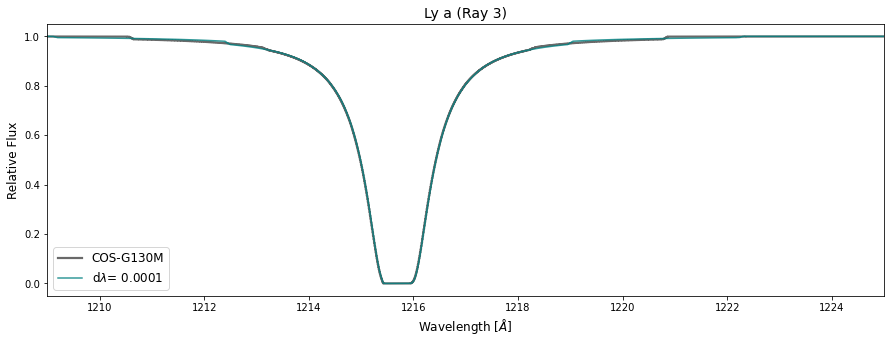

In [9]:
spec(ray_=ray3, lmin=1209, lmax=1225, line='Ly a',ins='COS-G130M', num='3', dlam=0.0001, col='teal')

# Si 1526

yt : [INFO     ] 2022-06-27 14:09:19,022 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:09:19,033 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:09:19,040 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:09:19,088 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2828.41it/s]
yt : [INFO     ] 2022-06-27 14:09:19,209 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:09:19,236 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 6499.61it/s]
yt : [INFO     ] 2022-06-27 14:09:19,309 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=

[array([array([1525.   , 1525.001, 1525.002, ..., 1528.998, 1528.999, 1529.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1524.995, 1525.008, 1525.02 , 1525.032, 1525.044, 1525.057,
               1525.069, 1525.081, 1525.093, 1525.105, 1525.118, 1525.13 ,
               1525.142, 1525.154, 1525.167, 1525.179, 1525.191, 1525.203,
               1525.216, 1525.228, 1525.24 , 1525.252, 1525.264, 1525.277,
               1525.289, 1525.301, 1525.313, 1525.326, 1525.338, 1525.35 ,
               1525.362, 1525.375, 1525.387, 1525.399, 1525.411, 1525.423,
               1525.436, 1525.448, 1525.46 , 1525.472, 1525.485, 1525.497,
               1525.509, 1525.521, 1525.534, 1525.546, 1525.558, 1525.57 ,
               1525.582, 1525.595, 1525.607, 1525.619, 1525.631, 1525.644,
               1525.656, 1525.668, 1525.68 , 1525.693, 1525.705, 1525.717,
               1525.729, 1525.741, 1525.754, 1525.766, 1525.778, 1525.79 ,
               1525.803, 1525.815, 1525.827, 15

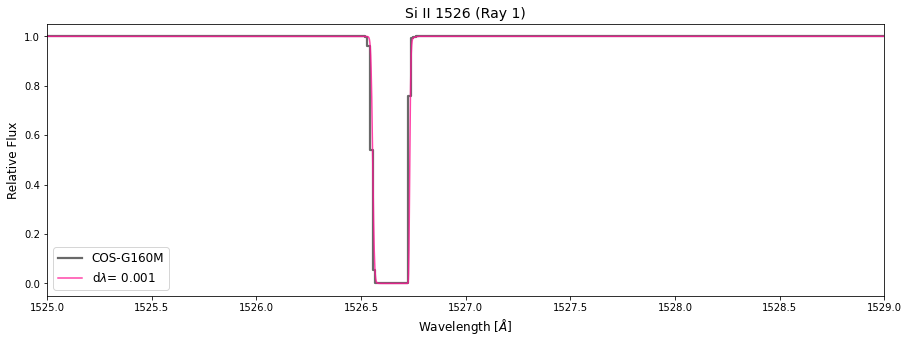

In [10]:
spec(ray1, 1525, 1529, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True, ins='COS-G160M', dlam2=0.01223, num='1')

yt : [INFO     ] 2022-06-27 14:09:23,579 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:09:23,591 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:09:23,599 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2780.37it/s]
yt : [INFO     ] 2022-06-27 14:09:23,734 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:09:23,742 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 6779.14it/s]
yt : [INFO     ] 2022-06-27 14:09:23,809 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tog = np.array([lam, flux, lam2, flux2])


[array([array([1526.2  , 1526.201, 1526.202, ..., 1527.198, 1527.199, 1527.2  ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1526.194, 1526.206, 1526.218, 1526.231, 1526.243, 1526.255,
               1526.267, 1526.28 , 1526.292, 1526.304, 1526.316, 1526.328,
               1526.341, 1526.353, 1526.365, 1526.377, 1526.39 , 1526.402,
               1526.414, 1526.426, 1526.439, 1526.451, 1526.463, 1526.475,
               1526.487, 1526.5  , 1526.512, 1526.524, 1526.536, 1526.549,
               1526.561, 1526.573, 1526.585, 1526.598, 1526.61 , 1526.622,
               1526.634, 1526.646, 1526.659, 1526.671, 1526.683, 1526.695,
               1526.708, 1526.72 , 1526.732, 1526.744, 1526.757, 1526.769,
               1526.781, 1526.793, 1526.805, 1526.818, 1526.83 , 1526.842,
               1526.854, 1526.867, 1526.879, 1526.891, 1526.903, 1526.915,
               1526.928, 1526.94 , 1526.952, 1526.964, 1526.977, 1526.989,
               1527.001, 1527.013, 1527.026, 15

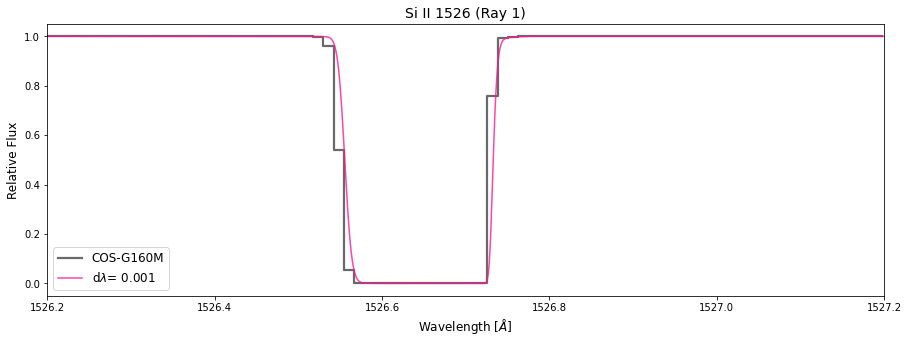

In [11]:
spec(ray1, 1526.2, 1527.2, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True, ins='COS-G160M', dlam2=0.01223, num='1')

yt : [INFO     ] 2022-06-27 14:09:29,929 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:09:29,940 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:09:29,947 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:09:29,953 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10060.17it/s]
yt : [INFO     ] 2022-06-27 14:09:30,019 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:09:30,045 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 17813.75it/s]
yt : [INFO     ] 2022-06-27 14:09:30,090 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtyp

[array([array([1525.   , 1525.001, 1525.002, ..., 1528.998, 1528.999, 1529.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1524.995, 1525.008, 1525.02 , 1525.032, 1525.044, 1525.057,
               1525.069, 1525.081, 1525.093, 1525.105, 1525.118, 1525.13 ,
               1525.142, 1525.154, 1525.167, 1525.179, 1525.191, 1525.203,
               1525.216, 1525.228, 1525.24 , 1525.252, 1525.264, 1525.277,
               1525.289, 1525.301, 1525.313, 1525.326, 1525.338, 1525.35 ,
               1525.362, 1525.375, 1525.387, 1525.399, 1525.411, 1525.423,
               1525.436, 1525.448, 1525.46 , 1525.472, 1525.485, 1525.497,
               1525.509, 1525.521, 1525.534, 1525.546, 1525.558, 1525.57 ,
               1525.582, 1525.595, 1525.607, 1525.619, 1525.631, 1525.644,
               1525.656, 1525.668, 1525.68 , 1525.693, 1525.705, 1525.717,
               1525.729, 1525.741, 1525.754, 1525.766, 1525.778, 1525.79 ,
               1525.803, 1525.815, 1525.827, 15

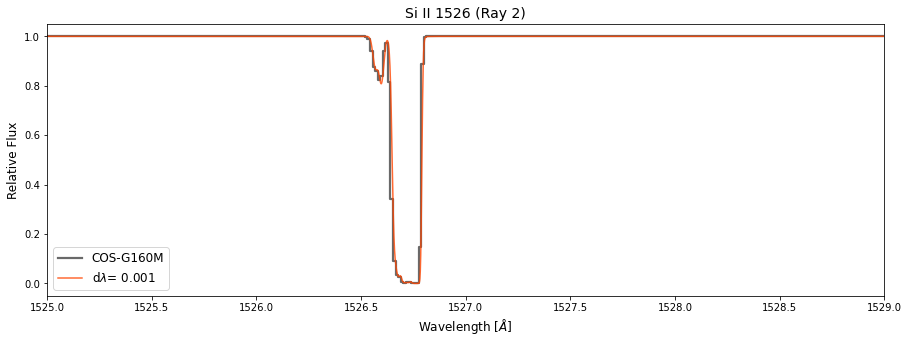

In [12]:
spec(ray2, 1525, 1529, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True, ins='COS-G160M', dlam2=0.01223, num='2', col='orangered')

yt : [INFO     ] 2022-06-27 14:09:37,469 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:09:37,481 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:09:37,490 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9955.97it/s]
yt : [INFO     ] 2022-06-27 14:09:37,559 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:09:37,566 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 17651.81it/s]
yt : [INFO     ] 2022-06-27 14:09:37,611 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tog = np.array([lam, flux, lam2, flux2])


[array([array([1526.2  , 1526.201, 1526.202, ..., 1527.198, 1527.199, 1527.2  ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1526.194, 1526.206, 1526.218, 1526.231, 1526.243, 1526.255,
               1526.267, 1526.28 , 1526.292, 1526.304, 1526.316, 1526.328,
               1526.341, 1526.353, 1526.365, 1526.377, 1526.39 , 1526.402,
               1526.414, 1526.426, 1526.439, 1526.451, 1526.463, 1526.475,
               1526.487, 1526.5  , 1526.512, 1526.524, 1526.536, 1526.549,
               1526.561, 1526.573, 1526.585, 1526.598, 1526.61 , 1526.622,
               1526.634, 1526.646, 1526.659, 1526.671, 1526.683, 1526.695,
               1526.708, 1526.72 , 1526.732, 1526.744, 1526.757, 1526.769,
               1526.781, 1526.793, 1526.805, 1526.818, 1526.83 , 1526.842,
               1526.854, 1526.867, 1526.879, 1526.891, 1526.903, 1526.915,
               1526.928, 1526.94 , 1526.952, 1526.964, 1526.977, 1526.989,
               1527.001, 1527.013, 1527.026, 15

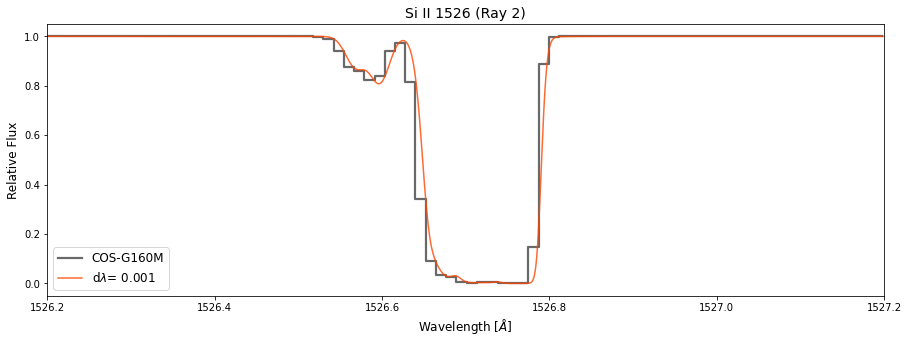

In [13]:
spec(ray2, 1526.2, 1527.2, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True, ins='COS-G160M', dlam2=0.01223, num='2', col='orangered')

yt : [INFO     ] 2022-06-27 14:09:50,596 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:09:50,606 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:09:50,612 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:09:50,619 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4659.45it/s]
yt : [INFO     ] 2022-06-27 14:09:50,710 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:09:50,735 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10427.82it/s]
yt : [INFO     ] 2022-06-27 14:09:50,790 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype

[array([array([1525.   , 1525.001, 1525.002, ..., 1528.998, 1528.999, 1529.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1524.995, 1525.008, 1525.02 , 1525.032, 1525.044, 1525.057,
               1525.069, 1525.081, 1525.093, 1525.105, 1525.118, 1525.13 ,
               1525.142, 1525.154, 1525.167, 1525.179, 1525.191, 1525.203,
               1525.216, 1525.228, 1525.24 , 1525.252, 1525.264, 1525.277,
               1525.289, 1525.301, 1525.313, 1525.326, 1525.338, 1525.35 ,
               1525.362, 1525.375, 1525.387, 1525.399, 1525.411, 1525.423,
               1525.436, 1525.448, 1525.46 , 1525.472, 1525.485, 1525.497,
               1525.509, 1525.521, 1525.534, 1525.546, 1525.558, 1525.57 ,
               1525.582, 1525.595, 1525.607, 1525.619, 1525.631, 1525.644,
               1525.656, 1525.668, 1525.68 , 1525.693, 1525.705, 1525.717,
               1525.729, 1525.741, 1525.754, 1525.766, 1525.778, 1525.79 ,
               1525.803, 1525.815, 1525.827, 15

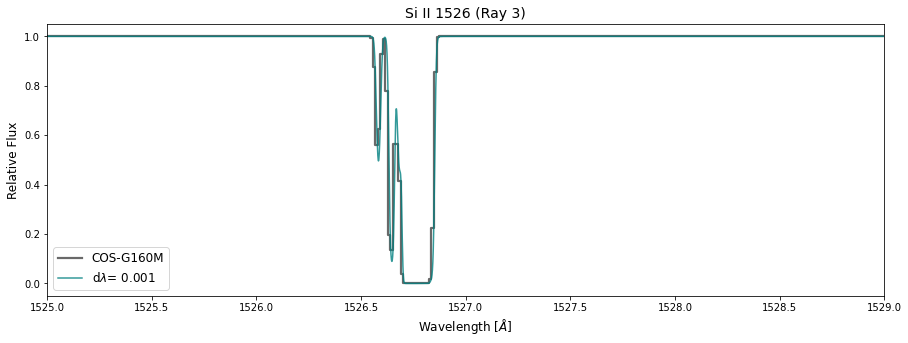

In [14]:
spec(ray3, 1525, 1529, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True, ins='COS-G160M', dlam2=0.01223, num='3', col='teal')

yt : [INFO     ] 2022-06-27 14:09:55,495 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:09:55,505 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:09:55,513 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4637.59it/s]
yt : [INFO     ] 2022-06-27 14:09:55,608 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:09:55,616 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10631.74it/s]
yt : [INFO     ] 2022-06-27 14:09:55,671 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tog = np.array([lam, flux, lam2, flux2])


[array([array([1526.2  , 1526.201, 1526.202, ..., 1527.198, 1527.199, 1527.2  ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1526.194, 1526.206, 1526.218, 1526.231, 1526.243, 1526.255,
               1526.267, 1526.28 , 1526.292, 1526.304, 1526.316, 1526.328,
               1526.341, 1526.353, 1526.365, 1526.377, 1526.39 , 1526.402,
               1526.414, 1526.426, 1526.439, 1526.451, 1526.463, 1526.475,
               1526.487, 1526.5  , 1526.512, 1526.524, 1526.536, 1526.549,
               1526.561, 1526.573, 1526.585, 1526.598, 1526.61 , 1526.622,
               1526.634, 1526.646, 1526.659, 1526.671, 1526.683, 1526.695,
               1526.708, 1526.72 , 1526.732, 1526.744, 1526.757, 1526.769,
               1526.781, 1526.793, 1526.805, 1526.818, 1526.83 , 1526.842,
               1526.854, 1526.867, 1526.879, 1526.891, 1526.903, 1526.915,
               1526.928, 1526.94 , 1526.952, 1526.964, 1526.977, 1526.989,
               1527.001, 1527.013, 1527.026, 15

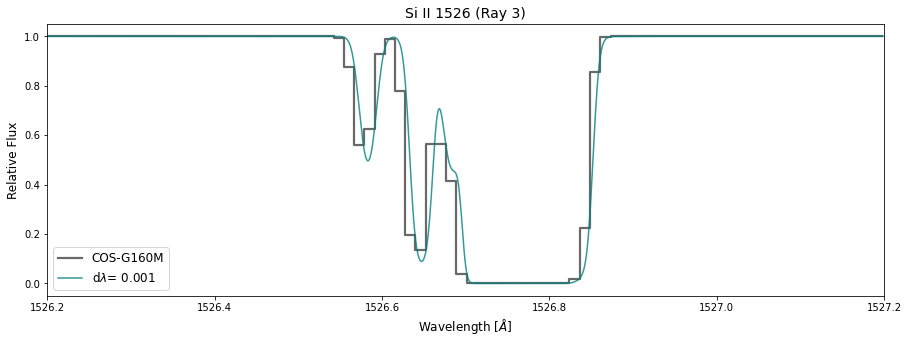

In [15]:
spec(ray3, 1526.2, 1527.2, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True, ins='COS-G160M', dlam2=0.01223, num='3', col='teal')

# Si III 1206

yt : [INFO     ] 2022-06-27 14:10:56,061 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:10:56,073 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:10:56,081 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2806.31it/s]
yt : [INFO     ] 2022-06-27 14:10:56,299 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:10:56,326 Creating spectrum
yt : [INFO     ] 2022-06-27 14:10:56,360 77 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5326.58it/s]
yt : [INFO     ] 2022-06-27 14:10:56,411 77 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5270.08it/s]
yt : [INFO     ] 2022-06-27 14:10:56,461 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Cr

[array([array([1204.5  , 1204.501, 1204.502, ..., 1208.498, 1208.499, 1208.5  ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1204.496, 1204.506, 1204.516, 1204.526, 1204.536, 1204.545,
               1204.555, 1204.565, 1204.575, 1204.585, 1204.595, 1204.605,
               1204.615, 1204.625, 1204.635, 1204.645, 1204.655, 1204.665,
               1204.675, 1204.685, 1204.695, 1204.705, 1204.715, 1204.725,
               1204.735, 1204.745, 1204.755, 1204.765, 1204.775, 1204.785,
               1204.795, 1204.805, 1204.815, 1204.825, 1204.835, 1204.845,
               1204.855, 1204.865, 1204.874, 1204.884, 1204.894, 1204.904,
               1204.914, 1204.924, 1204.934, 1204.944, 1204.954, 1204.964,
               1204.974, 1204.984, 1204.994, 1205.004, 1205.014, 1205.024,
               1205.034, 1205.044, 1205.054, 1205.064, 1205.074, 1205.084,
               1205.094, 1205.104, 1205.114, 1205.124, 1205.134, 1205.144,
               1205.154, 1205.164, 1205.174, 12

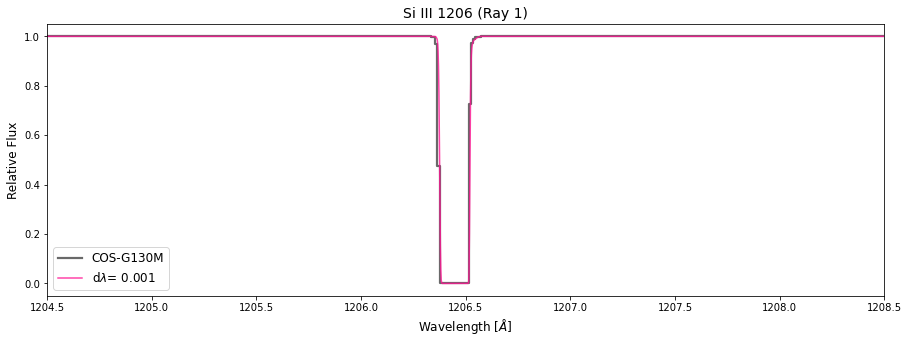

In [17]:
spec(ray1, 1204.5, 1208.5, el='Si', rom_num='III', lrest=1206.5, gamma=2.57E+09, 
     f_value=1.68E+00 , DIY=True, ins='COS-G130M', num='1')

yt : [INFO     ] 2022-06-27 14:11:03,485 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:11:03,495 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:11:03,503 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2842.68it/s]
yt : [INFO     ] 2022-06-27 14:11:03,718 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:11:03,726 Creating spectrum
yt : [INFO     ] 2022-06-27 14:11:03,758 77 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5150.80it/s]
yt : [INFO     ] 2022-06-27 14:11:03,810 77 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5303.71it/s]
yt : [INFO     ] 2022-06-27 14:11:03,859 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Cr

[array([array([1206.   , 1206.001, 1206.002, ..., 1206.998, 1206.999, 1207.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1206.001, 1206.011, 1206.021, 1206.031, 1206.041, 1206.051,
               1206.061, 1206.071, 1206.081, 1206.091, 1206.101, 1206.111,
               1206.121, 1206.131, 1206.141, 1206.151, 1206.161, 1206.171,
               1206.181, 1206.191, 1206.201, 1206.21 , 1206.22 , 1206.23 ,
               1206.24 , 1206.25 , 1206.26 , 1206.27 , 1206.28 , 1206.29 ,
               1206.3  , 1206.31 , 1206.32 , 1206.33 , 1206.34 , 1206.35 ,
               1206.36 , 1206.37 , 1206.38 , 1206.39 , 1206.4  , 1206.41 ,
               1206.42 , 1206.43 , 1206.44 , 1206.45 , 1206.46 , 1206.47 ,
               1206.48 , 1206.49 , 1206.5  , 1206.51 , 1206.52 , 1206.53 ,
               1206.539, 1206.549, 1206.559, 1206.569, 1206.579, 1206.589,
               1206.599, 1206.609, 1206.619, 1206.629, 1206.639, 1206.649,
               1206.659, 1206.669, 1206.679, 12

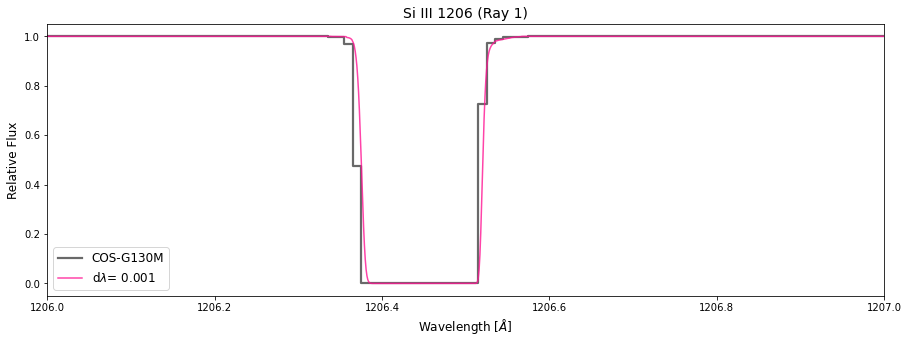

In [18]:
spec(ray1, 1206, 1207, el='Si', rom_num='III', lrest=1206.5, gamma=2.57E+09, 
     f_value=1.68E+00 , DIY=True, ins='COS-G130M', num='1')

yt : [INFO     ] 2022-06-27 14:11:13,284 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:11:13,296 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:11:13,301 Creating Si_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:11:13,306 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9233.31it/s]
yt : [INFO     ] 2022-06-27 14:11:13,400 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:11:13,426 Creating spectrum
yt : [INFO     ] 2022-06-27 14:11:13,455 11 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 14110.17it/s]
yt : [INFO     ] 2022-06-27 14:11:13,475 11 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 13697.96it/s]
yt : [INFO     ] 2022-06-27 1

[array([array([1204.5  , 1204.501, 1204.502, ..., 1208.498, 1208.499, 1208.5  ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1204.496, 1204.506, 1204.516, 1204.526, 1204.536, 1204.545,
               1204.555, 1204.565, 1204.575, 1204.585, 1204.595, 1204.605,
               1204.615, 1204.625, 1204.635, 1204.645, 1204.655, 1204.665,
               1204.675, 1204.685, 1204.695, 1204.705, 1204.715, 1204.725,
               1204.735, 1204.745, 1204.755, 1204.765, 1204.775, 1204.785,
               1204.795, 1204.805, 1204.815, 1204.825, 1204.835, 1204.845,
               1204.855, 1204.865, 1204.874, 1204.884, 1204.894, 1204.904,
               1204.914, 1204.924, 1204.934, 1204.944, 1204.954, 1204.964,
               1204.974, 1204.984, 1204.994, 1205.004, 1205.014, 1205.024,
               1205.034, 1205.044, 1205.054, 1205.064, 1205.074, 1205.084,
               1205.094, 1205.104, 1205.114, 1205.124, 1205.134, 1205.144,
               1205.154, 1205.164, 1205.174, 12

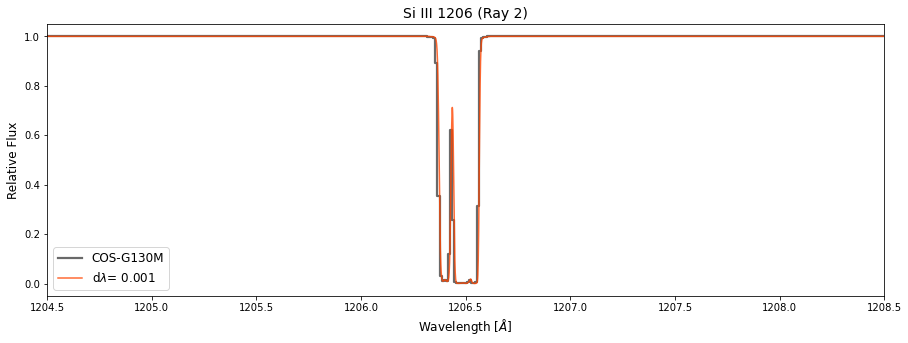

In [19]:
spec(ray2, 1204.5, 1208.5, el='Si', rom_num='III', lrest=1206.5, gamma=2.57E+09, 
     f_value=1.68E+00 , DIY=True, ins='COS-G130M', num='2', col='orangered')

yt : [INFO     ] 2022-06-27 14:11:43,022 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:11:43,033 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:11:43,040 Creating Si_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:11:43,045 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4740.50it/s]
yt : [INFO     ] 2022-06-27 14:11:43,192 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:11:43,212 Creating spectrum
yt : [INFO     ] 2022-06-27 14:11:43,241 38 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7930.85it/s]
yt : [INFO     ] 2022-06-27 14:11:43,275 38 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7751.19it/s]
yt : [INFO     ] 2022-06-27 14:

[array([array([1205.   , 1205.001, 1205.002, ..., 1207.998, 1207.999, 1208.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1205.004, 1205.014, 1205.024, 1205.034, 1205.044, 1205.054,
               1205.064, 1205.074, 1205.084, 1205.094, 1205.104, 1205.114,
               1205.124, 1205.134, 1205.144, 1205.154, 1205.164, 1205.174,
               1205.184, 1205.194, 1205.204, 1205.213, 1205.223, 1205.233,
               1205.243, 1205.253, 1205.263, 1205.273, 1205.283, 1205.293,
               1205.303, 1205.313, 1205.323, 1205.333, 1205.343, 1205.353,
               1205.363, 1205.373, 1205.383, 1205.393, 1205.403, 1205.413,
               1205.423, 1205.433, 1205.443, 1205.453, 1205.463, 1205.473,
               1205.483, 1205.493, 1205.503, 1205.513, 1205.523, 1205.533,
               1205.542, 1205.552, 1205.562, 1205.572, 1205.582, 1205.592,
               1205.602, 1205.612, 1205.622, 1205.632, 1205.642, 1205.652,
               1205.662, 1205.672, 1205.682, 12

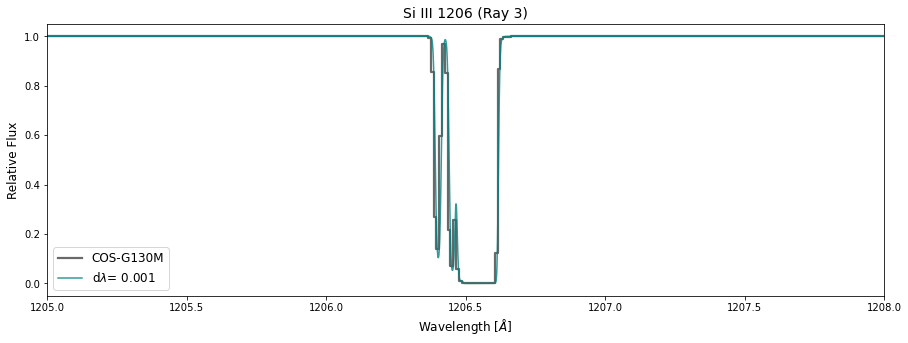

In [20]:
spec(ray3, 1205, 1208, el='Si', rom_num='III', lrest=1206.5, gamma=2.57E+09, 
     f_value=1.68E+00 , DIY=True, ins='COS-G130M', num='3', col='teal')

yt : [INFO     ] 2022-06-27 14:11:52,279 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:11:52,290 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:11:52,296 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4710.22it/s]
yt : [INFO     ] 2022-06-27 14:11:52,440 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:11:52,448 Creating spectrum
yt : [INFO     ] 2022-06-27 14:11:52,477 38 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 8161.68it/s]
yt : [INFO     ] 2022-06-27 14:11:52,510 38 out of 256 line components will be deposited as unresolved lines.
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7706.24it/s]
yt : [INFO     ] 2022-06-27 14:11:52,545 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Cr

[array([array([1206.   , 1206.001, 1206.002, ..., 1206.998, 1206.999, 1207.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1206.001, 1206.011, 1206.021, 1206.031, 1206.041, 1206.051,
               1206.061, 1206.071, 1206.081, 1206.091, 1206.101, 1206.111,
               1206.121, 1206.131, 1206.141, 1206.151, 1206.161, 1206.171,
               1206.181, 1206.191, 1206.201, 1206.21 , 1206.22 , 1206.23 ,
               1206.24 , 1206.25 , 1206.26 , 1206.27 , 1206.28 , 1206.29 ,
               1206.3  , 1206.31 , 1206.32 , 1206.33 , 1206.34 , 1206.35 ,
               1206.36 , 1206.37 , 1206.38 , 1206.39 , 1206.4  , 1206.41 ,
               1206.42 , 1206.43 , 1206.44 , 1206.45 , 1206.46 , 1206.47 ,
               1206.48 , 1206.49 , 1206.5  , 1206.51 , 1206.52 , 1206.53 ,
               1206.539, 1206.549, 1206.559, 1206.569, 1206.579, 1206.589,
               1206.599, 1206.609, 1206.619, 1206.629, 1206.639, 1206.649,
               1206.659, 1206.669, 1206.679, 12

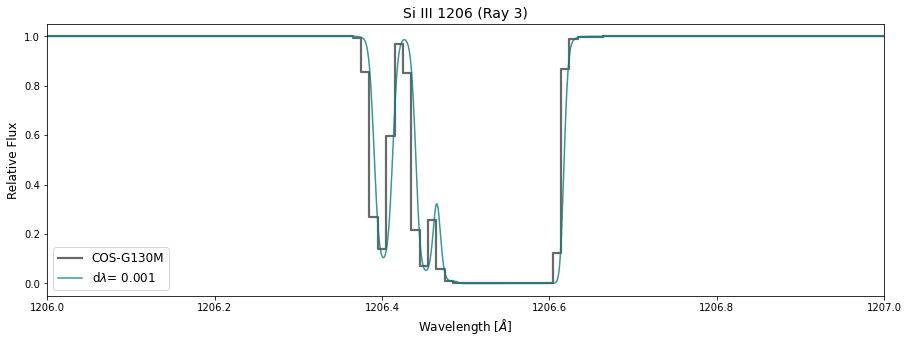

In [21]:
spec(ray3, 1206, 1207, el='Si', rom_num='III', lrest=1206.5, gamma=2.57E+09, 
     f_value=1.68E+00 , DIY=True, ins='COS-G130M', num='3', col='teal')

# Si IV 1393

yt : [INFO     ] 2022-06-27 14:12:02,158 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:12:02,169 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:12:02,177 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:12:02,211 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 256/256 [00:00<00:00, 3541.43it/s]
yt : [INFO     ] 2022-06-27 14:12:02,320 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:12:02,345 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 256/256 [00:00<00:00, 6837.03it/s]
yt : [INFO     ] 2022-06-27 14:12:02,413 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=

[array([array([1392.   , 1392.001, 1392.002, ..., 1395.998, 1395.999, 1396.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1392.001, 1392.011, 1392.021, 1392.031, 1392.041, 1392.051,
               1392.061, 1392.071, 1392.081, 1392.091, 1392.101, 1392.111,
               1392.121, 1392.131, 1392.141, 1392.151, 1392.161, 1392.171,
               1392.181, 1392.191, 1392.201, 1392.211, 1392.221, 1392.231,
               1392.241, 1392.251, 1392.261, 1392.271, 1392.281, 1392.291,
               1392.301, 1392.311, 1392.32 , 1392.33 , 1392.34 , 1392.35 ,
               1392.36 , 1392.37 , 1392.38 , 1392.39 , 1392.4  , 1392.41 ,
               1392.42 , 1392.43 , 1392.44 , 1392.45 , 1392.46 , 1392.47 ,
               1392.48 , 1392.49 , 1392.5  , 1392.51 , 1392.52 , 1392.53 ,
               1392.54 , 1392.55 , 1392.56 , 1392.57 , 1392.58 , 1392.59 ,
               1392.6  , 1392.61 , 1392.62 , 1392.63 , 1392.64 , 1392.649,
               1392.659, 1392.669, 1392.679, 13

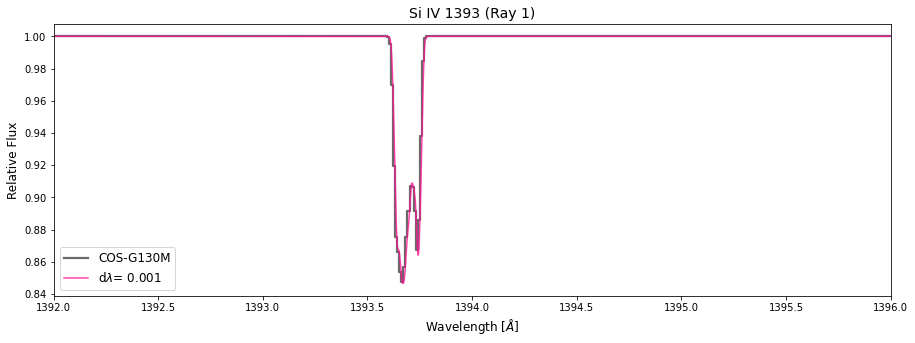

In [22]:
spec(ray1, 1392, 1396, el='Si', rom_num='IV', lrest=1393.7550, gamma=9.0E+8, 
     f_value=5.24E-01, DIY=True, ins='COS-G130M', num='1')

yt : [INFO     ] 2022-06-27 14:12:08,416 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:12:08,428 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:12:08,436 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:12:08,441 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10232.54it/s]
yt : [INFO     ] 2022-06-27 14:12:08,507 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:12:08,533 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 256/256 [00:00<00:00, 16218.93it/s]
yt : [INFO     ] 2022-06-27 14:12:08,578 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtyp

[array([array([1392.   , 1392.001, 1392.002, ..., 1395.998, 1395.999, 1396.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1392.001, 1392.011, 1392.021, 1392.031, 1392.041, 1392.051,
               1392.061, 1392.071, 1392.081, 1392.091, 1392.101, 1392.111,
               1392.121, 1392.131, 1392.141, 1392.151, 1392.161, 1392.171,
               1392.181, 1392.191, 1392.201, 1392.211, 1392.221, 1392.231,
               1392.241, 1392.251, 1392.261, 1392.271, 1392.281, 1392.291,
               1392.301, 1392.311, 1392.32 , 1392.33 , 1392.34 , 1392.35 ,
               1392.36 , 1392.37 , 1392.38 , 1392.39 , 1392.4  , 1392.41 ,
               1392.42 , 1392.43 , 1392.44 , 1392.45 , 1392.46 , 1392.47 ,
               1392.48 , 1392.49 , 1392.5  , 1392.51 , 1392.52 , 1392.53 ,
               1392.54 , 1392.55 , 1392.56 , 1392.57 , 1392.58 , 1392.59 ,
               1392.6  , 1392.61 , 1392.62 , 1392.63 , 1392.64 , 1392.649,
               1392.659, 1392.669, 1392.679, 13

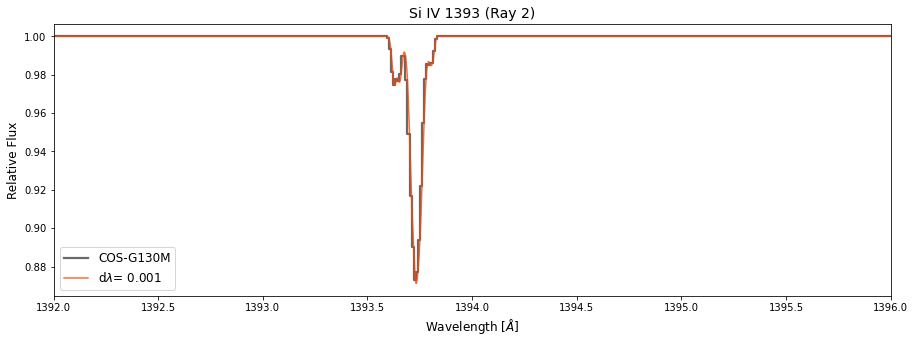

In [23]:
spec(ray2, 1392, 1396, el='Si', rom_num='IV', lrest=1393.7550, gamma=9.0E+8, 
     f_value=5.24E-01, DIY=True, ins='COS-G130M', num='2', col='orangered')

yt : [INFO     ] 2022-06-27 14:12:12,306 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:12:12,318 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:12:12,323 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:12:12,327 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5618.68it/s]
yt : [INFO     ] 2022-06-27 14:12:12,409 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:12:12,434 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10269.15it/s]
yt : [INFO     ] 2022-06-27 14:12:12,489 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype

[array([array([1392.   , 1392.001, 1392.002, ..., 1395.998, 1395.999, 1396.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1392.001, 1392.011, 1392.021, 1392.031, 1392.041, 1392.051,
               1392.061, 1392.071, 1392.081, 1392.091, 1392.101, 1392.111,
               1392.121, 1392.131, 1392.141, 1392.151, 1392.161, 1392.171,
               1392.181, 1392.191, 1392.201, 1392.211, 1392.221, 1392.231,
               1392.241, 1392.251, 1392.261, 1392.271, 1392.281, 1392.291,
               1392.301, 1392.311, 1392.32 , 1392.33 , 1392.34 , 1392.35 ,
               1392.36 , 1392.37 , 1392.38 , 1392.39 , 1392.4  , 1392.41 ,
               1392.42 , 1392.43 , 1392.44 , 1392.45 , 1392.46 , 1392.47 ,
               1392.48 , 1392.49 , 1392.5  , 1392.51 , 1392.52 , 1392.53 ,
               1392.54 , 1392.55 , 1392.56 , 1392.57 , 1392.58 , 1392.59 ,
               1392.6  , 1392.61 , 1392.62 , 1392.63 , 1392.64 , 1392.649,
               1392.659, 1392.669, 1392.679, 13

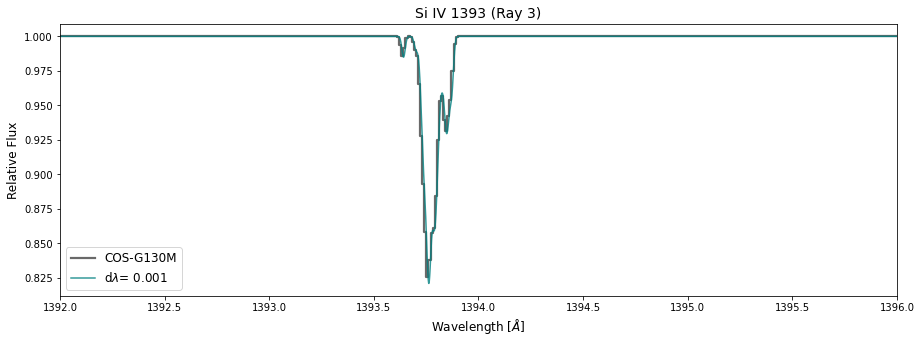

In [24]:
spec(ray3, 1392, 1396, el='Si', rom_num='IV', lrest=1393.7550, gamma=9.0E+8, 
     f_value=5.24E-01, DIY=True, ins='COS-G130M', num='3', col='teal')

# C II 1334

yt : [INFO     ] 2022-06-27 14:13:42,411 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:13:42,423 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:13:42,429 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2678.72it/s]
yt : [INFO     ] 2022-06-27 14:13:42,557 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:13:42,582 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5030.46it/s]
yt : [INFO     ] 2022-06-27 14:13:42,668 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tog = np.array([lam, flux, lam2, flux2])


[array([array([1333.   , 1333.001, 1333.002, ..., 1336.998, 1336.999, 1337.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1332.999, 1333.009, 1333.019, 1333.029, 1333.039, 1333.049,
               1333.059, 1333.069, 1333.079, 1333.089, 1333.099, 1333.109,
               1333.119, 1333.129, 1333.139, 1333.149, 1333.158, 1333.168,
               1333.178, 1333.188, 1333.198, 1333.208, 1333.218, 1333.228,
               1333.238, 1333.248, 1333.258, 1333.268, 1333.278, 1333.288,
               1333.298, 1333.308, 1333.318, 1333.328, 1333.338, 1333.348,
               1333.358, 1333.368, 1333.378, 1333.388, 1333.398, 1333.408,
               1333.418, 1333.428, 1333.438, 1333.448, 1333.458, 1333.468,
               1333.478, 1333.487, 1333.497, 1333.507, 1333.517, 1333.527,
               1333.537, 1333.547, 1333.557, 1333.567, 1333.577, 1333.587,
               1333.597, 1333.607, 1333.617, 1333.627, 1333.637, 1333.647,
               1333.657, 1333.667, 1333.677, 13

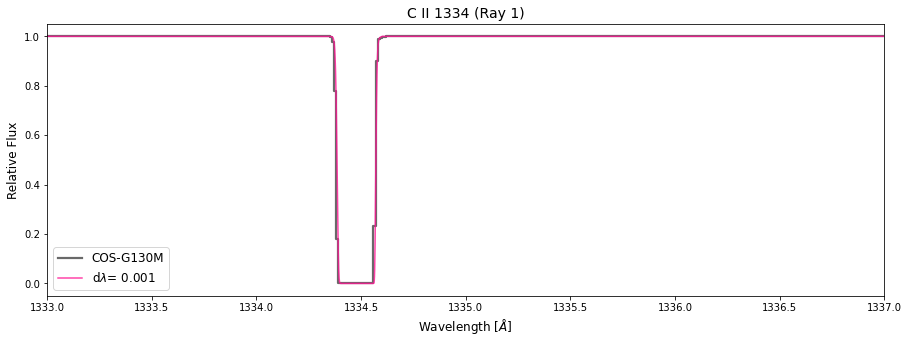

In [26]:
spec(ray1, 1333, 1337, el='C', rom_num='II', lrest=1334.5320,
    gamma=2.38E+08, f_value=1.27E-01, DIY=True, ins='COS-G130M', num='1')

yt : [INFO     ] 2022-06-27 14:13:47,443 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:13:47,454 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:13:47,461 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:13:47,466 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9156.93it/s]
yt : [INFO     ] 2022-06-27 14:13:47,537 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:13:47,562 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 15001.42it/s]
yt : [INFO     ] 2022-06-27 14:13:47,609 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=ob

[array([array([1333.   , 1333.001, 1333.002, ..., 1336.998, 1336.999, 1337.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1332.999, 1333.009, 1333.019, 1333.029, 1333.039, 1333.049,
               1333.059, 1333.069, 1333.079, 1333.089, 1333.099, 1333.109,
               1333.119, 1333.129, 1333.139, 1333.149, 1333.158, 1333.168,
               1333.178, 1333.188, 1333.198, 1333.208, 1333.218, 1333.228,
               1333.238, 1333.248, 1333.258, 1333.268, 1333.278, 1333.288,
               1333.298, 1333.308, 1333.318, 1333.328, 1333.338, 1333.348,
               1333.358, 1333.368, 1333.378, 1333.388, 1333.398, 1333.408,
               1333.418, 1333.428, 1333.438, 1333.448, 1333.458, 1333.468,
               1333.478, 1333.487, 1333.497, 1333.507, 1333.517, 1333.527,
               1333.537, 1333.547, 1333.557, 1333.567, 1333.577, 1333.587,
               1333.597, 1333.607, 1333.617, 1333.627, 1333.637, 1333.647,
               1333.657, 1333.667, 1333.677, 13

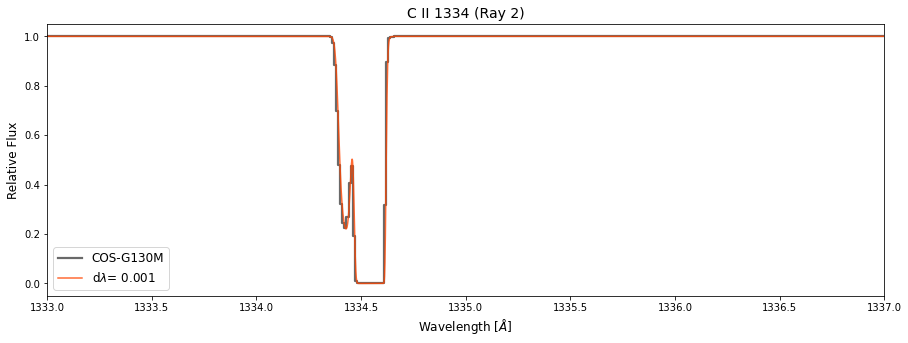

In [27]:
spec(ray2, 1333, 1337, el='C', rom_num='II', lrest=1334.5320,
    gamma=2.38E+08, f_value=1.27E-01, DIY=True, ins='COS-G130M', num='2', col='orangered')

yt : [INFO     ] 2022-06-27 14:13:52,493 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:13:52,505 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:13:52,512 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:13:52,517 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4325.05it/s]
yt : [INFO     ] 2022-06-27 14:13:52,620 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:13:52,645 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 8280.76it/s]
yt : [INFO     ] 2022-06-27 14:13:52,706 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=obj

[array([array([1333.   , 1333.001, 1333.002, ..., 1336.998, 1336.999, 1337.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1332.999, 1333.009, 1333.019, 1333.029, 1333.039, 1333.049,
               1333.059, 1333.069, 1333.079, 1333.089, 1333.099, 1333.109,
               1333.119, 1333.129, 1333.139, 1333.149, 1333.158, 1333.168,
               1333.178, 1333.188, 1333.198, 1333.208, 1333.218, 1333.228,
               1333.238, 1333.248, 1333.258, 1333.268, 1333.278, 1333.288,
               1333.298, 1333.308, 1333.318, 1333.328, 1333.338, 1333.348,
               1333.358, 1333.368, 1333.378, 1333.388, 1333.398, 1333.408,
               1333.418, 1333.428, 1333.438, 1333.448, 1333.458, 1333.468,
               1333.478, 1333.487, 1333.497, 1333.507, 1333.517, 1333.527,
               1333.537, 1333.547, 1333.557, 1333.567, 1333.577, 1333.587,
               1333.597, 1333.607, 1333.617, 1333.627, 1333.637, 1333.647,
               1333.657, 1333.667, 1333.677, 13

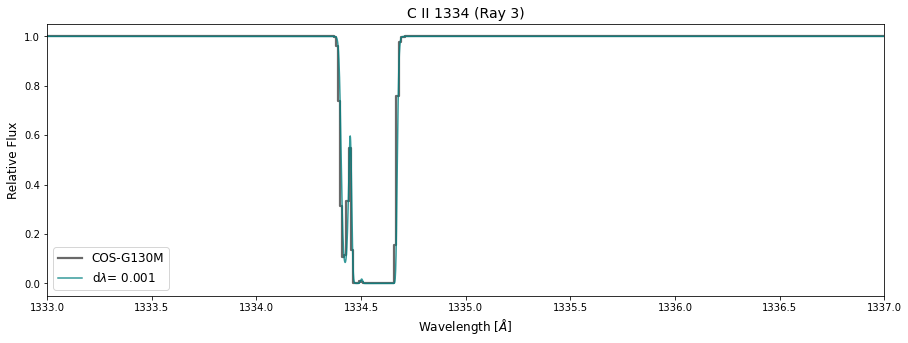

In [28]:
spec(ray3, 1333, 1337, el='C', rom_num='II', lrest=1334.5320,
    gamma=2.38E+08, f_value=1.27E-01, DIY=True, ins='COS-G130M', num='3', col='teal')

# C III 977

yt : [INFO     ] 2022-06-27 14:14:04,389 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:14:04,400 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:14:04,408 Creating C_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:14:04,429 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 256/256 [00:00<00:00, 2622.20it/s]
yt : [INFO     ] 2022-06-27 14:14:04,656 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:14:04,683 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 256/256 [00:00<00:00, 5241.06it/s]
yt : [INFO     ] 2022-06-27 14:14:04,812 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=objec

[array([array([975.   , 975.001, 975.002, ..., 978.998, 978.999, 979.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([974.9962, 975.0062, 975.0162, 975.0261, 975.0361, 975.0461,
               975.056 , 975.066 , 975.076 , 975.0859, 975.0959, 975.1059,
               975.1159, 975.1258, 975.1358, 975.1458, 975.1557, 975.1657,
               975.1757, 975.1856, 975.1956, 975.2056, 975.2156, 975.2255,
               975.2355, 975.2455, 975.2554, 975.2654, 975.2754, 975.2853,
               975.2953, 975.3053, 975.3152, 975.3252, 975.3352, 975.3452,
               975.3551, 975.3651, 975.3751, 975.385 , 975.395 , 975.405 ,
               975.4149, 975.4249, 975.4349, 975.4449, 975.4548, 975.4648,
               975.4748, 975.4847, 975.4947, 975.5047, 975.5146, 975.5246,
               975.5346, 975.5446, 975.5545, 975.5645, 975.5745, 975.5844,
               975.5944, 975.6044, 975.6144, 975.6243, 975.6343, 975.6443,
               975.6542, 975.6642, 975.6742, 975.6841

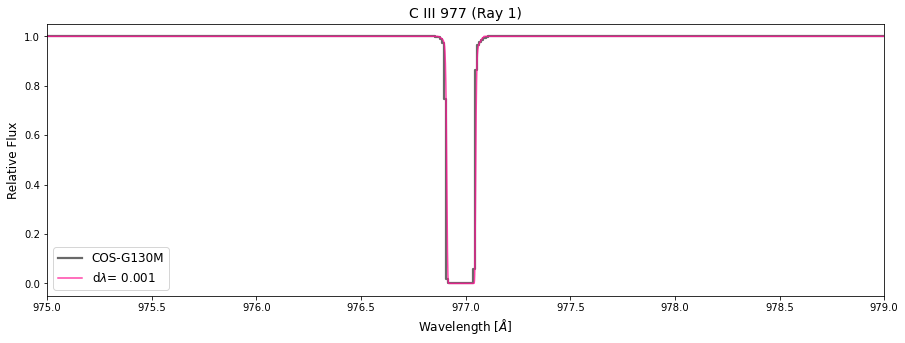

In [30]:
spec(ray1, 975, 979, el='C', rom_num='III', lrest=977.0201,
    gamma=1.79E+09, f_value=7.67E-01, DIY=True, ins='COS-G130M', num='1')


yt : [INFO     ] 2022-06-27 14:14:09,384 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:14:09,395 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:14:09,401 Creating C_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:14:09,406 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 256/256 [00:00<00:00, 8374.15it/s]
yt : [INFO     ] 2022-06-27 14:14:09,506 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:14:09,532 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 256/256 [00:00<00:00, 11908.76it/s]
yt : [INFO     ] 2022-06-27 14:14:09,604 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=obje

[array([array([975.   , 975.001, 975.002, ..., 978.998, 978.999, 979.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([974.9962, 975.0062, 975.0162, 975.0261, 975.0361, 975.0461,
               975.056 , 975.066 , 975.076 , 975.0859, 975.0959, 975.1059,
               975.1159, 975.1258, 975.1358, 975.1458, 975.1557, 975.1657,
               975.1757, 975.1856, 975.1956, 975.2056, 975.2156, 975.2255,
               975.2355, 975.2455, 975.2554, 975.2654, 975.2754, 975.2853,
               975.2953, 975.3053, 975.3152, 975.3252, 975.3352, 975.3452,
               975.3551, 975.3651, 975.3751, 975.385 , 975.395 , 975.405 ,
               975.4149, 975.4249, 975.4349, 975.4449, 975.4548, 975.4648,
               975.4748, 975.4847, 975.4947, 975.5047, 975.5146, 975.5246,
               975.5346, 975.5446, 975.5545, 975.5645, 975.5745, 975.5844,
               975.5944, 975.6044, 975.6144, 975.6243, 975.6343, 975.6443,
               975.6542, 975.6642, 975.6742, 975.6841

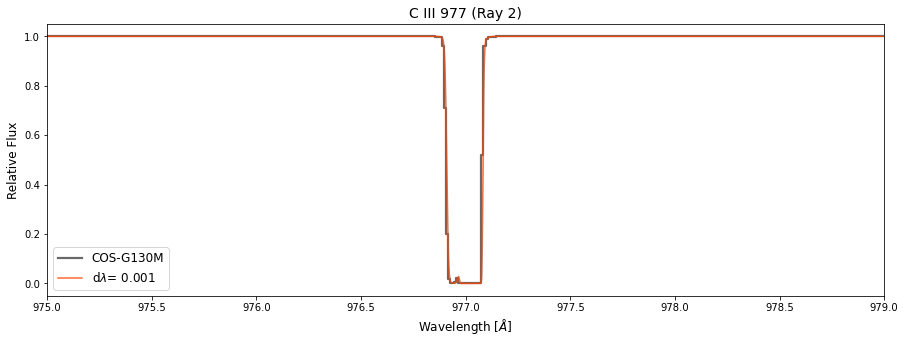

In [31]:
spec(ray2, 975, 979, el='C', rom_num='III', lrest=977.0201,
    gamma=1.79E+09, f_value=7.67E-01, DIY=True, ins='COS-G130M', num='2', col='orangered')

yt : [INFO     ] 2022-06-27 14:14:16,075 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:14:16,087 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:14:16,093 Creating C_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:14:16,097 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 256/256 [00:00<00:00, 4301.87it/s]
yt : [INFO     ] 2022-06-27 14:14:16,250 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:14:16,276 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 256/256 [00:00<00:00, 7428.27it/s]
yt : [INFO     ] 2022-06-27 14:14:16,383 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=objec

[array([array([975.   , 975.001, 975.002, ..., 978.998, 978.999, 979.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([974.9962, 975.0062, 975.0162, 975.0261, 975.0361, 975.0461,
               975.056 , 975.066 , 975.076 , 975.0859, 975.0959, 975.1059,
               975.1159, 975.1258, 975.1358, 975.1458, 975.1557, 975.1657,
               975.1757, 975.1856, 975.1956, 975.2056, 975.2156, 975.2255,
               975.2355, 975.2455, 975.2554, 975.2654, 975.2754, 975.2853,
               975.2953, 975.3053, 975.3152, 975.3252, 975.3352, 975.3452,
               975.3551, 975.3651, 975.3751, 975.385 , 975.395 , 975.405 ,
               975.4149, 975.4249, 975.4349, 975.4449, 975.4548, 975.4648,
               975.4748, 975.4847, 975.4947, 975.5047, 975.5146, 975.5246,
               975.5346, 975.5446, 975.5545, 975.5645, 975.5745, 975.5844,
               975.5944, 975.6044, 975.6144, 975.6243, 975.6343, 975.6443,
               975.6542, 975.6642, 975.6742, 975.6841

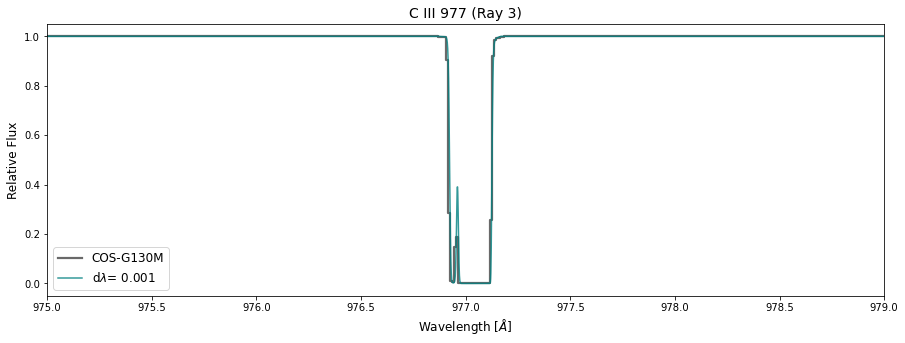

In [32]:
spec(ray3, 975, 979, el='C', rom_num='III', lrest=977.0201,
    gamma=1.79E+09, f_value=7.67E-01, DIY=True, ins='COS-G130M', num='3', col='teal')

# C IV 1548

yt : [INFO     ] 2022-06-27 14:14:24,874 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:14:24,885 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:14:24,894 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:14:24,914 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5558.45it/s]
yt : [INFO     ] 2022-06-27 14:14:24,999 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:14:25,018 Creating spectrum
yt : [INFO     ] 2022-06-27 14:14:25,048 79 out of 256 line components will be deposited as unresolved lines.
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5479.59it/s]
yt : [INFO     ] 2022-06-27 14:14:25,097 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or 

[array([array([1547.   , 1547.001, 1547.002, ..., 1549.998, 1549.999, 1550.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1546.979, 1547.06 , 1547.14 , 1547.22 , 1547.301, 1547.381,
               1547.461, 1547.542, 1547.622, 1547.702, 1547.783, 1547.863,
               1547.943, 1548.023, 1548.104, 1548.184, 1548.264, 1548.345,
               1548.425, 1548.505, 1548.585, 1548.666, 1548.746, 1548.826,
               1548.907, 1548.987, 1549.067, 1549.148, 1549.228, 1549.308,
               1549.389, 1549.469, 1549.549, 1549.629, 1549.71 , 1549.79 ,
               1549.87 , 1549.951, 1550.031])                             ,
        array([1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
               1.       , 1.       , 1.       , 1.       , 1.       , 0.9999999,
               0.9999998, 0.9908417, 0.9901685, 0.9987507, 0.9999996, 0.9999996,
               0.9999999, 0.9999973, 0.9999978, 1.       , 1.       , 1.       ,
               1.     

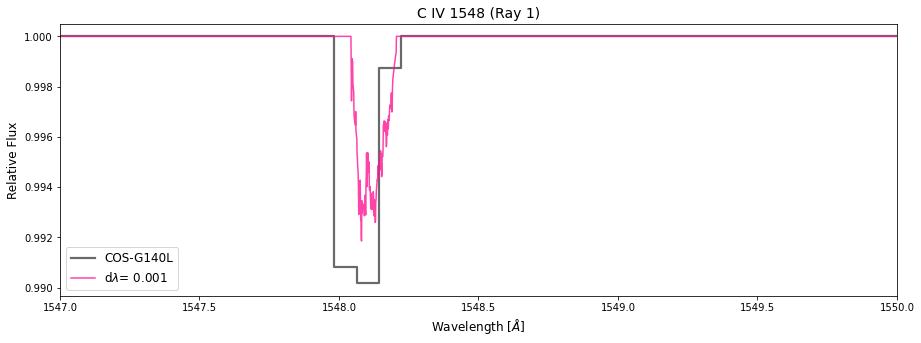

In [33]:
spec(ray1, 1547,1550, line='C IV 1548', dlam2=0.0803, ins='COS-G140L', num='1')

yt : [INFO     ] 2022-06-27 14:14:30,679 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:14:30,693 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:14:30,701 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:14:30,707 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5291.79it/s]
yt : [INFO     ] 2022-06-27 14:14:30,799 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:14:30,819 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 6233.84it/s]
yt : [INFO     ] 2022-06-27 14:14:30,890 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=obj

[array([array([1547.   , 1547.001, 1547.002, ..., 1549.998, 1549.999, 1550.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1546.997, 1547.009, 1547.022, 1547.034, 1547.046, 1547.058,
               1547.071, 1547.083, 1547.095, 1547.107, 1547.119, 1547.132,
               1547.144, 1547.156, 1547.168, 1547.181, 1547.193, 1547.205,
               1547.217, 1547.23 , 1547.242, 1547.254, 1547.266, 1547.278,
               1547.291, 1547.303, 1547.315, 1547.327, 1547.34 , 1547.352,
               1547.364, 1547.376, 1547.389, 1547.401, 1547.413, 1547.425,
               1547.437, 1547.45 , 1547.462, 1547.474, 1547.486, 1547.499,
               1547.511, 1547.523, 1547.535, 1547.548, 1547.56 , 1547.572,
               1547.584, 1547.596, 1547.609, 1547.621, 1547.633, 1547.645,
               1547.658, 1547.67 , 1547.682, 1547.694, 1547.706, 1547.719,
               1547.731, 1547.743, 1547.755, 1547.768, 1547.78 , 1547.792,
               1547.804, 1547.817, 1547.829, 15

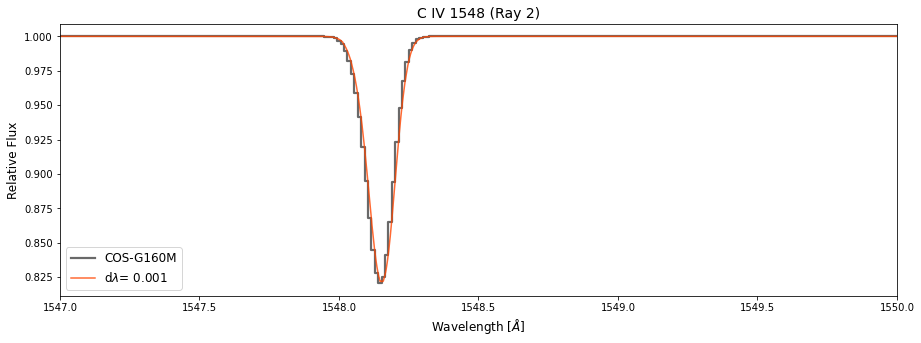

In [34]:
spec(ray2, 1547,1550, line='C IV 1548', dlam2=0.01223, ins='COS-G160M', num='2', col='orangered')

yt : [INFO     ] 2022-06-27 14:14:34,598 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:14:34,610 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:14:34,619 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:14:34,623 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5615.25it/s]
yt : [INFO     ] 2022-06-27 14:14:34,709 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:14:34,729 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 6240.54it/s]
yt : [INFO     ] 2022-06-27 14:14:34,801 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=obj

[array([array([1547.   , 1547.001, 1547.002, ..., 1549.998, 1549.999, 1550.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1546.997, 1547.009, 1547.022, 1547.034, 1547.046, 1547.058,
               1547.071, 1547.083, 1547.095, 1547.107, 1547.119, 1547.132,
               1547.144, 1547.156, 1547.168, 1547.181, 1547.193, 1547.205,
               1547.217, 1547.23 , 1547.242, 1547.254, 1547.266, 1547.278,
               1547.291, 1547.303, 1547.315, 1547.327, 1547.34 , 1547.352,
               1547.364, 1547.376, 1547.389, 1547.401, 1547.413, 1547.425,
               1547.437, 1547.45 , 1547.462, 1547.474, 1547.486, 1547.499,
               1547.511, 1547.523, 1547.535, 1547.548, 1547.56 , 1547.572,
               1547.584, 1547.596, 1547.609, 1547.621, 1547.633, 1547.645,
               1547.658, 1547.67 , 1547.682, 1547.694, 1547.706, 1547.719,
               1547.731, 1547.743, 1547.755, 1547.768, 1547.78 , 1547.792,
               1547.804, 1547.817, 1547.829, 15

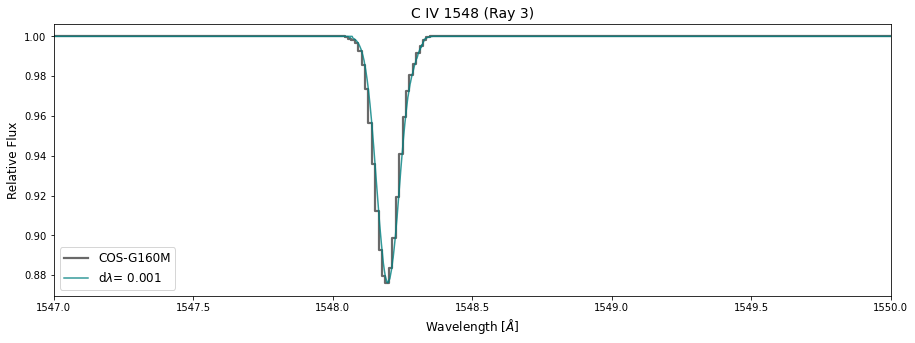

In [35]:
spec(ray3, 1547,1550, line='C IV 1548', dlam2=0.01223, ins='COS-G160M', num='3', col='teal')

# O I 1302

yt : [INFO     ] 2022-06-27 14:14:41,601 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:14:41,613 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:14:41,622 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:14:41,653 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2816.16it/s]
yt : [INFO     ] 2022-06-27 14:14:41,780 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:14:41,807 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5350.52it/s]
yt : [INFO     ] 2022-06-27 14:14:41,887 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' 

[array([array([1300.   , 1300.001, 1300.002, ..., 1303.998, 1303.999, 1304.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1299.998, 1300.008, 1300.018, 1300.028, 1300.038, 1300.048,
               1300.058, 1300.068, 1300.078, 1300.088, 1300.098, 1300.108,
               1300.118, 1300.128, 1300.138, 1300.148, 1300.158, 1300.168,
               1300.178, 1300.188, 1300.198, 1300.208, 1300.218, 1300.228,
               1300.238, 1300.248, 1300.257, 1300.267, 1300.277, 1300.287,
               1300.297, 1300.307, 1300.317, 1300.327, 1300.337, 1300.347,
               1300.357, 1300.367, 1300.377, 1300.387, 1300.397, 1300.407,
               1300.417, 1300.427, 1300.437, 1300.447, 1300.457, 1300.467,
               1300.477, 1300.487, 1300.497, 1300.507, 1300.517, 1300.527,
               1300.537, 1300.547, 1300.557, 1300.567, 1300.577, 1300.587,
               1300.596, 1300.606, 1300.616, 1300.626, 1300.636, 1300.646,
               1300.656, 1300.666, 1300.676, 13

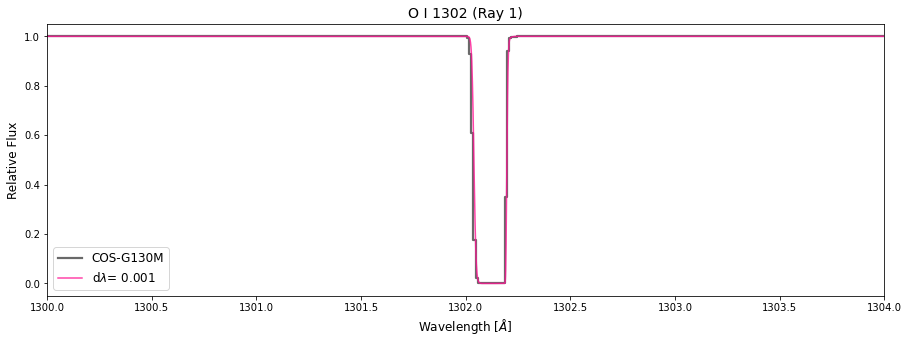

In [36]:
spec(ray1, 1300, 1304, line='O I 1302', ins='COS-G130M', num='1')

yt : [INFO     ] 2022-06-27 14:14:44,896 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:14:44,908 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:14:44,916 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:14:44,922 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10396.01it/s]
yt : [INFO     ] 2022-06-27 14:14:44,990 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:14:45,016 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 15796.59it/s]
yt : [INFO     ] 2022-06-27 14:14:45,063 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object

[array([array([1300.   , 1300.001, 1300.002, ..., 1303.998, 1303.999, 1304.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1299.998, 1300.008, 1300.018, 1300.028, 1300.038, 1300.048,
               1300.058, 1300.068, 1300.078, 1300.088, 1300.098, 1300.108,
               1300.118, 1300.128, 1300.138, 1300.148, 1300.158, 1300.168,
               1300.178, 1300.188, 1300.198, 1300.208, 1300.218, 1300.228,
               1300.238, 1300.248, 1300.257, 1300.267, 1300.277, 1300.287,
               1300.297, 1300.307, 1300.317, 1300.327, 1300.337, 1300.347,
               1300.357, 1300.367, 1300.377, 1300.387, 1300.397, 1300.407,
               1300.417, 1300.427, 1300.437, 1300.447, 1300.457, 1300.467,
               1300.477, 1300.487, 1300.497, 1300.507, 1300.517, 1300.527,
               1300.537, 1300.547, 1300.557, 1300.567, 1300.577, 1300.587,
               1300.596, 1300.606, 1300.616, 1300.626, 1300.636, 1300.646,
               1300.656, 1300.666, 1300.676, 13

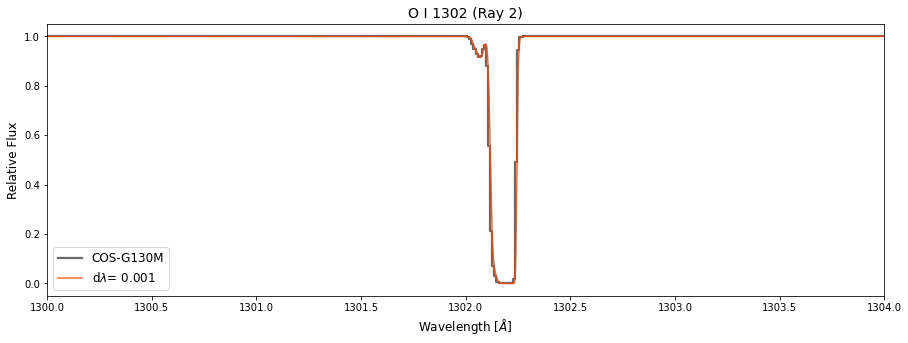

In [37]:
spec(ray2, 1300, 1304, line='O I 1302', ins='COS-G130M', num='2', col='orangered')

yt : [INFO     ] 2022-06-27 14:14:50,589 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:14:50,600 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:14:50,609 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9935.25it/s]
yt : [INFO     ] 2022-06-27 14:14:50,678 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:14:50,686 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 16375.25it/s]
yt : [INFO     ] 2022-06-27 14:14:50,731 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tog = np.array([lam, flux, lam2, flux2])


[array([array([1301.75 , 1301.751, 1301.752, ..., 1302.748, 1302.749, 1302.75 ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1301.753, 1301.763, 1301.773, 1301.783, 1301.793, 1301.803,
               1301.813, 1301.823, 1301.833, 1301.843, 1301.853, 1301.863,
               1301.873, 1301.883, 1301.893, 1301.903, 1301.913, 1301.922,
               1301.932, 1301.942, 1301.952, 1301.962, 1301.972, 1301.982,
               1301.992, 1302.002, 1302.012, 1302.022, 1302.032, 1302.042,
               1302.052, 1302.062, 1302.072, 1302.082, 1302.092, 1302.102,
               1302.112, 1302.122, 1302.132, 1302.142, 1302.152, 1302.162,
               1302.172, 1302.182, 1302.192, 1302.202, 1302.212, 1302.222,
               1302.232, 1302.242, 1302.251, 1302.261, 1302.271, 1302.281,
               1302.291, 1302.301, 1302.311, 1302.321, 1302.331, 1302.341,
               1302.351, 1302.361, 1302.371, 1302.381, 1302.391, 1302.401,
               1302.411, 1302.421, 1302.431, 13

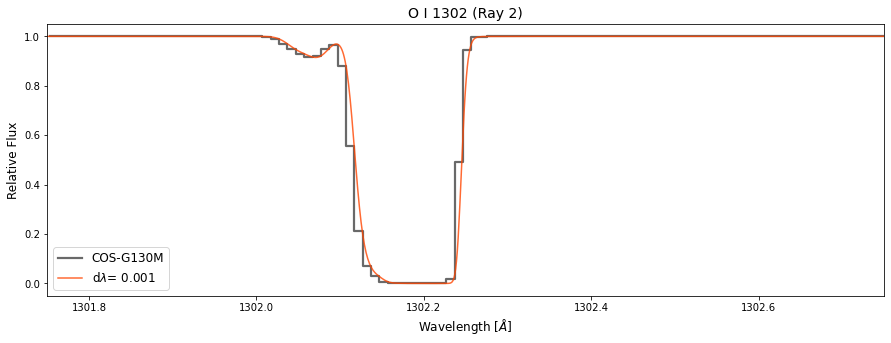

In [38]:
spec(ray2, 1301.75, 1302.75, line='O I 1302', ins='COS-G130M', num='2', col='orangered')

yt : [INFO     ] 2022-06-27 14:15:03,135 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:15:03,145 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:15:03,153 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:15:03,158 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4863.89it/s]
yt : [INFO     ] 2022-06-27 14:15:03,248 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:15:03,273 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 8902.45it/s]
yt : [INFO     ] 2022-06-27 14:15:03,332 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' 

[array([array([1300.   , 1300.001, 1300.002, ..., 1303.998, 1303.999, 1304.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1299.998, 1300.008, 1300.018, 1300.028, 1300.038, 1300.048,
               1300.058, 1300.068, 1300.078, 1300.088, 1300.098, 1300.108,
               1300.118, 1300.128, 1300.138, 1300.148, 1300.158, 1300.168,
               1300.178, 1300.188, 1300.198, 1300.208, 1300.218, 1300.228,
               1300.238, 1300.248, 1300.257, 1300.267, 1300.277, 1300.287,
               1300.297, 1300.307, 1300.317, 1300.327, 1300.337, 1300.347,
               1300.357, 1300.367, 1300.377, 1300.387, 1300.397, 1300.407,
               1300.417, 1300.427, 1300.437, 1300.447, 1300.457, 1300.467,
               1300.477, 1300.487, 1300.497, 1300.507, 1300.517, 1300.527,
               1300.537, 1300.547, 1300.557, 1300.567, 1300.577, 1300.587,
               1300.596, 1300.606, 1300.616, 1300.626, 1300.636, 1300.646,
               1300.656, 1300.666, 1300.676, 13

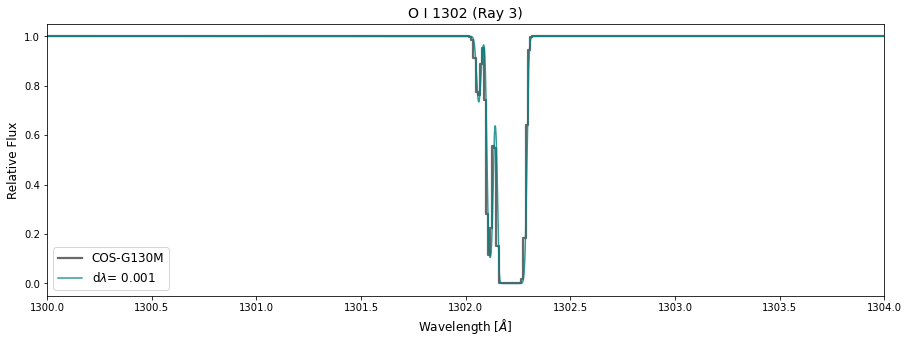

In [39]:
spec(ray3, 1300, 1304, line='O I 1302', ins='COS-G130M', num='3', col='teal')

# O II 834

yt : [INFO     ] 2022-06-27 14:15:24,730 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:15:24,741 Creating O_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:15:24,769 Creating spectrum
yt : [INFO     ] 2022-06-27 14:15:24,805 79 out of 256 line components will be deposited as unresolved lines.
Adding line - O II 833 [833.330300 A]: : 100%|██████████| 256/256 [00:00<00:00, 8925.16it/s]
yt : [INFO     ] 2022-06-27 14:15:24,835 79 out of 256 line components will be deposited as unresolved lines.
Adding line - O II 833 [832.758300 A]: : 100%|██████████| 256/256 [00:00<00:00, 9180.89it/s]
yt : [INFO     ] 2022-06-27 14:15:24,865 79 out of 256 line components will be deposited as unresolved lines.
Adding line - O II 833 [833.801900 A]: : 100%|██████████| 256/256 [00:00<00:00, 8276.23it/s]
yt : [INFO     ] 2022-06-27 14:15:24,897 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:15:24,900 Setting instrument to 

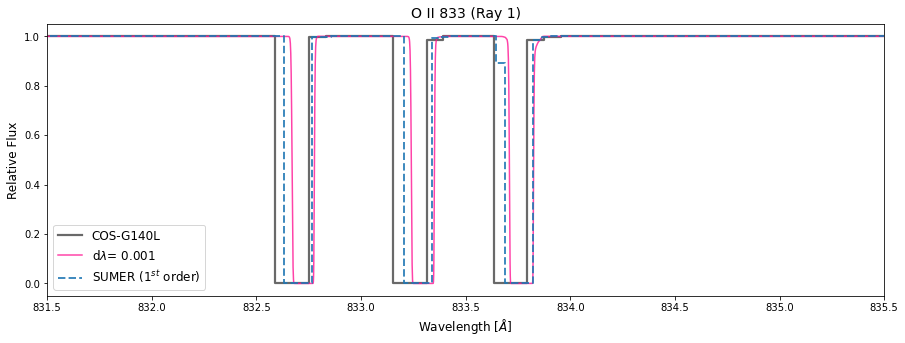

In [41]:
O834_SUM = spec_extra(ray1, 831.5, 835.5, dlam=0.044, line=None, 
             el='O', rom_num='II', lrest=833.8019, gamma=8.51E+08, f_value=2.66E-01, DIY=True)

spec(ray1, 831.5, 835.5, el='O', rom_num='II', lrest=833.8019,
    gamma=8.51E+08, f_value=2.66E-01, DIY=True, ins='COS-G140L', dlam2=0.0803, num='1')
plt.step(O834_SUM[0], O834_SUM[1], label='SUMER (1$^{st}$ order)', alpha=0.85, ls='--', lw=2, where='mid')
plt.legend(fontsize=12)

yt : [INFO     ] 2022-06-27 14:15:33,651 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:15:33,656 Creating O_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:15:33,659 Creating spectrum
yt : [INFO     ] 2022-06-27 14:15:33,691 17 out of 256 line components will be deposited as unresolved lines.
Adding line - O II 833 [833.330300 A]: : 100%|██████████| 256/256 [00:00<00:00, 19388.27it/s]
yt : [INFO     ] 2022-06-27 14:15:33,706 17 out of 256 line components will be deposited as unresolved lines.
Adding line - O II 833 [832.758300 A]: : 100%|██████████| 256/256 [00:00<00:00, 20400.16it/s]
yt : [INFO     ] 2022-06-27 14:15:33,720 17 out of 256 line components will be deposited as unresolved lines.
Adding line - O II 833 [833.801900 A]: : 100%|██████████| 256/256 [00:00<00:00, 17366.31it/s]
yt : [INFO     ] 2022-06-27 14:15:33,736 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:15:33,739 Setting instrument 

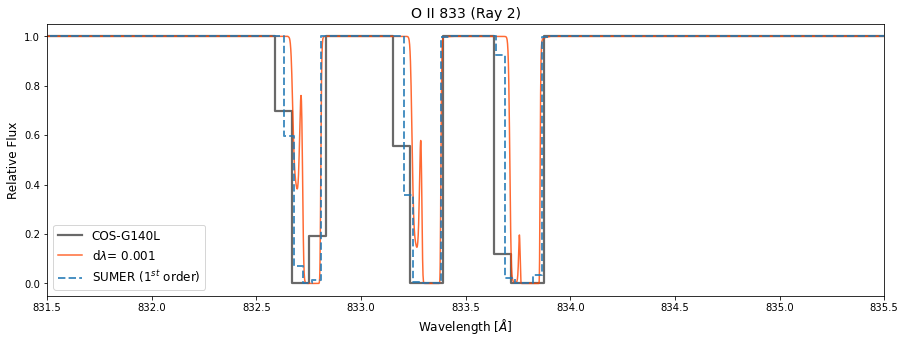

In [42]:
O834_SUM2 = spec_extra(ray2, 831.5, 835.5, dlam=0.044, line=None, 
             el='O', rom_num='II', lrest=833.8019, gamma=8.51E+08, f_value=2.66E-01, DIY=True)

spec(ray2, 831.5, 835.5, el='O', rom_num='II', lrest=833.8019,
    gamma=8.51E+08, f_value=2.66E-01, DIY=True, ins='COS-G140L', dlam2=0.0803, num='2', col='orangered')
plt.step(O834_SUM2[0], O834_SUM2[1], label='SUMER (1$^{st}$ order)', alpha=0.8, ls='--', lw=2, where='mid')
plt.legend(fontsize=12)

yt : [INFO     ] 2022-06-27 14:15:40,560 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:15:40,569 Creating O_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:15:40,575 Creating spectrum
yt : [INFO     ] 2022-06-27 14:15:40,612 44 out of 256 line components will be deposited as unresolved lines.
Adding line - O II 833 [833.330300 A]: : 100%|██████████| 256/256 [00:00<00:00, 13311.12it/s]
yt : [INFO     ] 2022-06-27 14:15:40,634 44 out of 256 line components will be deposited as unresolved lines.
Adding line - O II 833 [832.758300 A]: : 100%|██████████| 256/256 [00:00<00:00, 13525.58it/s]
yt : [INFO     ] 2022-06-27 14:15:40,654 44 out of 256 line components will be deposited as unresolved lines.
Adding line - O II 833 [833.801900 A]: : 100%|██████████| 256/256 [00:00<00:00, 11687.24it/s]
yt : [INFO     ] 2022-06-27 14:15:40,678 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:15:40,681 Setting instrument 

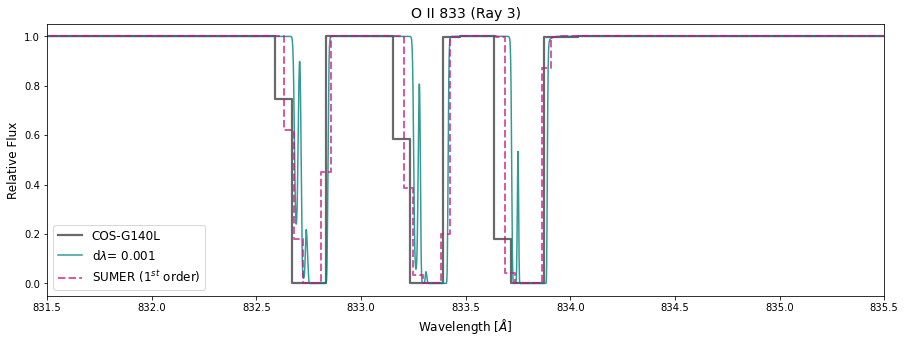

In [43]:
O834_SUM3 = spec_extra(ray3, 831.5, 835.5, dlam=0.044, line=None, 
             el='O', rom_num='II', lrest=833.8019, gamma=8.51E+08, f_value=2.66E-01, DIY=True)

spec(ray3, 831.5, 835.5, el='O', rom_num='II', lrest=833.8019,
    gamma=8.51E+08, f_value=2.66E-01, DIY=True, ins='COS-G140L', dlam2=0.0803, num='3', col='teal')
plt.step(O834_SUM3[0], O834_SUM3[1], label='SUMER (1$^{st}$ order)', alpha=0.7, ls='--', lw=2, 
         color='mediumvioletred', where='mid')
plt.legend(fontsize=12)

# O III 702

yt : [INFO     ] 2022-06-27 14:15:54,974 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:15:54,985 Creating O_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:15:55,011 Creating spectrum
yt : [INFO     ] 2022-06-27 14:15:55,048 79 out of 256 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9367.10it/s]
yt : [INFO     ] 2022-06-27 14:15:55,077 79 out of 256 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9566.14it/s]
yt : [INFO     ] 2022-06-27 14:15:55,105 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:15:55,108 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:15:55,111 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:15:55,114 Creating spectrum
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/25

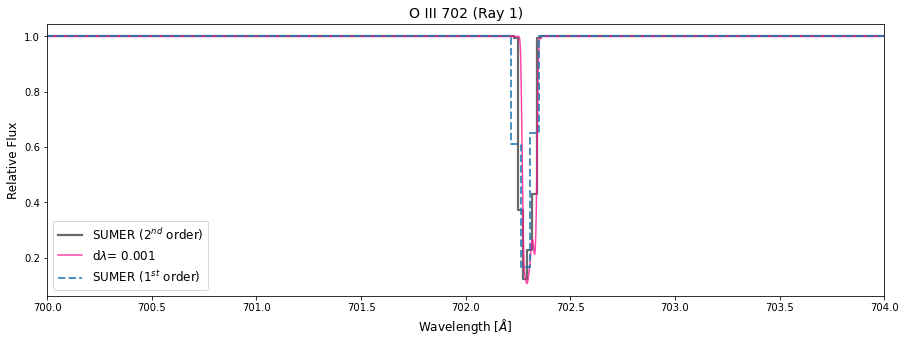

In [45]:
O702 = spec_extra(ray1, 700,704,  el='O', rom_num='III', lrest=702.3370,
                  gamma=6.17E+08, f_value=1.37E-01, DIY=True, dlam=0.044)
spec(ray1, 700, 704, el='O', rom_num='III', lrest=702.3370,
    gamma=6.17E+08, f_value=1.37E-01, DIY=True, ins='SUMER (2$^{nd}$ order)', dlam2=0.022, num='1')
plt.step(O702[0], O702[1], lw=2, ls='--', alpha=0.8, label='SUMER (1$^{st}$ order)', where='mid')
plt.legend(fontsize=12)

yt : [INFO     ] 2022-06-27 14:15:58,308 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:15:58,319 Creating spectrum
yt : [INFO     ] 2022-06-27 14:15:58,365 79 out of 256 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9210.34it/s]
yt : [INFO     ] 2022-06-27 14:15:58,395 79 out of 256 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9742.42it/s]
yt : [INFO     ] 2022-06-27 14:15:58,423 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:15:58,425 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:15:58,428 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:15:58,431 Creating spectrum
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/256 [00:00<00:00, 3669.73it/s]
yt : [INFO     ] 2022-06-27 14:15:58,603 Writing spectrum to ascii file: spec.txt.
yt :

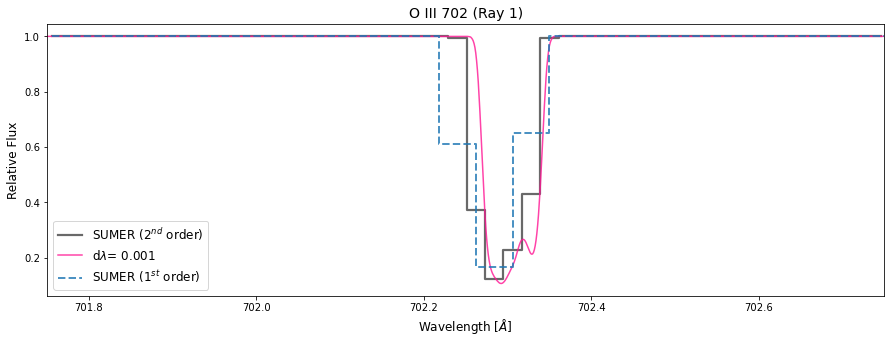

In [46]:
O702 = spec_extra(ray1, 701.75,702.75,  el='O', rom_num='III', lrest=702.3370,
                  gamma=6.17E+08, f_value=1.37E-01, DIY=True, dlam=0.044)
spec(ray1, 701.75, 702.75, el='O', rom_num='III', lrest=702.3370,
    gamma=6.17E+08, f_value=1.37E-01, DIY=True, ins='SUMER (2$^{nd}$ order)', dlam2=0.022, num='1')
plt.step(O702[0], O702[1], lw=2, ls='--', alpha=0.8, label='SUMER (1$^{st}$ order)', where='mid')
plt.legend(fontsize=12)

yt : [INFO     ] 2022-06-27 14:16:01,040 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:16:01,051 Creating O_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:16:01,057 Creating spectrum
yt : [INFO     ] 2022-06-27 14:16:01,101 19 out of 256 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/256 [00:00<00:00, 17872.17it/s]
yt : [INFO     ] 2022-06-27 14:16:01,118 19 out of 256 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/256 [00:00<00:00, 20015.69it/s]
yt : [INFO     ] 2022-06-27 14:16:01,132 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:16:01,135 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:16:01,138 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:16:01,141 Creating spectrum
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/

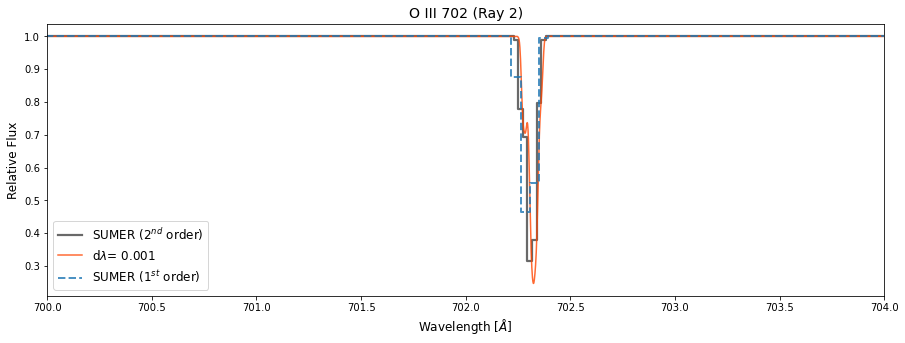

In [47]:
O7022 = spec_extra(ray2, 700,704,  el='O', rom_num='III', lrest=702.3370,
                  gamma=6.17E+08, f_value=1.37E-01, DIY=True, dlam=0.044)
spec(ray2, 700, 704, el='O', rom_num='III', lrest=702.3370,
    gamma=6.17E+08, f_value=1.37E-01, DIY=True, ins='SUMER (2$^{nd}$ order)', dlam2=0.022, 
     num='2', col='orangered')
plt.step(O7022[0], O7022[1], lw=2, ls='--', alpha=0.8, label='SUMER (1$^{st}$ order)', where='mid')
plt.legend(fontsize=12)

yt : [INFO     ] 2022-06-27 14:16:05,895 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:16:05,908 Creating spectrum
yt : [INFO     ] 2022-06-27 14:16:05,952 19 out of 256 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/256 [00:00<00:00, 18007.64it/s]
yt : [INFO     ] 2022-06-27 14:16:05,969 19 out of 256 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/256 [00:00<00:00, 20078.20it/s]
yt : [INFO     ] 2022-06-27 14:16:05,983 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:16:05,985 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:16:05,988 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:16:05,991 Creating spectrum
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10969.76it/s]
yt : [INFO     ] 2022-06-27 14:16:06,071 Writing spectrum to ascii file: spec.txt.
y

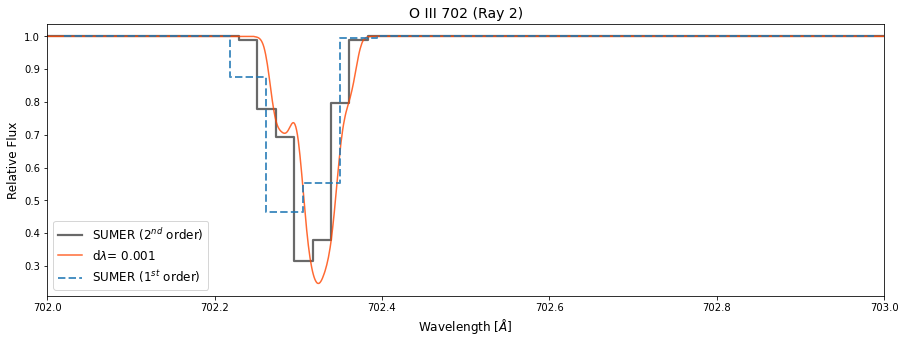

In [48]:
O7022 = spec_extra(ray2, 702,703,  el='O', rom_num='III', lrest=702.3370,
                  gamma=6.17E+08, f_value=1.37E-01, DIY=True, dlam=0.044)
spec(ray2, 702, 703, el='O', rom_num='III', lrest=702.3370,
    gamma=6.17E+08, f_value=1.37E-01, DIY=True, ins='SUMER (2$^{nd}$ order)', dlam2=0.022, 
     num='2', col='orangered')
plt.step(O7022[0], O7022[1], lw=2, ls='--', alpha=0.8, label='SUMER (1$^{st}$ order)', where='mid')
plt.legend(fontsize=12)

yt : [INFO     ] 2022-06-27 14:16:08,059 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:16:08,070 Creating O_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:16:08,076 Creating spectrum
yt : [INFO     ] 2022-06-27 14:16:08,118 45 out of 256 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/256 [00:00<00:00, 13473.48it/s]
yt : [INFO     ] 2022-06-27 14:16:08,139 45 out of 256 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/256 [00:00<00:00, 14098.50it/s]
yt : [INFO     ] 2022-06-27 14:16:08,158 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:16:08,162 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:16:08,165 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:16:08,168 Creating spectrum
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/

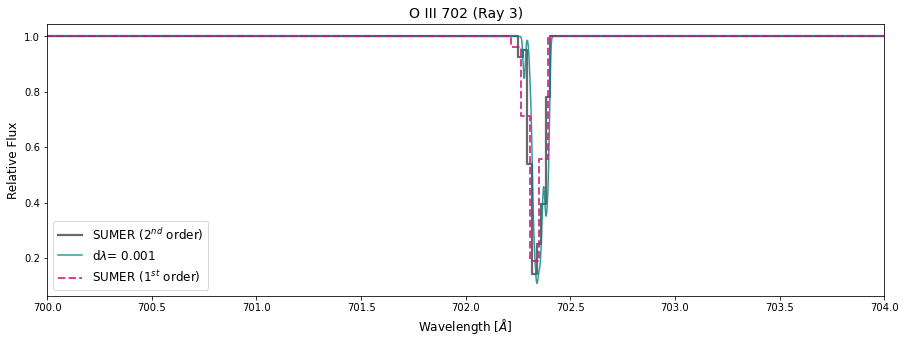

In [49]:
O7023 = spec_extra(ray3, 700,704,  el='O', rom_num='III', lrest=702.3370,
                  gamma=6.17E+08, f_value=1.37E-01, DIY=True, dlam=0.044)
spec(ray3, 700, 704, el='O', rom_num='III', lrest=702.3370,
    gamma=6.17E+08, f_value=1.37E-01, DIY=True, ins='SUMER (2$^{nd}$ order)', dlam2=0.022, 
     num='3', col='teal')
plt.step(O7023[0], O7023[1], lw=2, ls='--', alpha=0.8, label='SUMER (1$^{st}$ order)', 
         color='mediumvioletred', where='mid')
plt.legend(fontsize=12)

yt : [INFO     ] 2022-06-27 14:16:09,964 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:16:09,976 Creating spectrum
yt : [INFO     ] 2022-06-27 14:16:10,021 45 out of 256 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/256 [00:00<00:00, 13043.99it/s]
yt : [INFO     ] 2022-06-27 14:16:10,043 45 out of 256 line components will be deposited as unresolved lines.
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/256 [00:00<00:00, 14572.05it/s]
yt : [INFO     ] 2022-06-27 14:16:10,062 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:16:10,064 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:16:10,067 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:16:10,070 Creating spectrum
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5473.11it/s]
yt : [INFO     ] 2022-06-27 14:16:10,191 Writing spectrum to ascii file: spec.txt.
yt

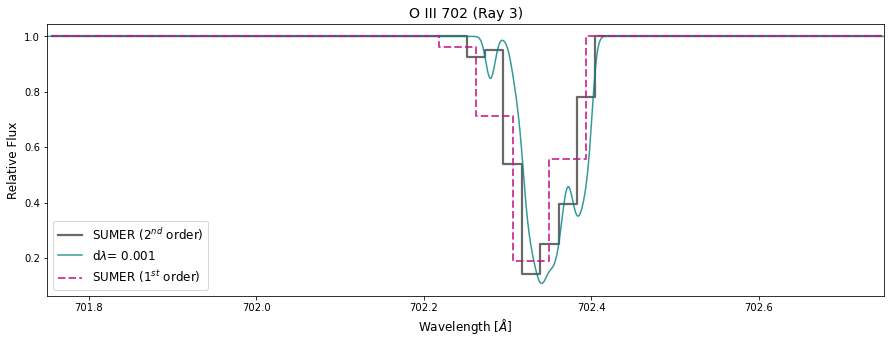

In [50]:
O7023 = spec_extra(ray3, 701.75,702.75,  el='O', rom_num='III', lrest=702.3370,
                  gamma=6.17E+08, f_value=1.37E-01, DIY=True, dlam=0.044)
spec(ray3, 701.75, 702.75, el='O', rom_num='III', lrest=702.3370,
    gamma=6.17E+08, f_value=1.37E-01, DIY=True, ins='SUMER (2$^{nd}$ order)', dlam2=0.022, 
     num='3', col='teal')
plt.step(O7023[0], O7023[1], lw=2, ls='--', alpha=0.8, label='SUMER (1$^{st}$ order)', 
         color='mediumvioletred', where='mid')
plt.legend(fontsize=12)

# Al II 1670

yt : [INFO     ] 2022-06-27 14:16:27,179 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:16:27,189 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:16:27,198 Creating Al_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:16:27,235 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 2614.92it/s]
yt : [INFO     ] 2022-06-27 14:16:27,368 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:16:27,394 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 5940.91it/s]
yt : [INFO     ] 2022-06-27 14:16:27,472 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=

[array([array([1669.   , 1669.001, 1669.002, ..., 1672.998, 1672.999, 1673.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1669.004, 1669.016, 1669.028, 1669.04 , 1669.053, 1669.065,
               1669.077, 1669.089, 1669.101, 1669.114, 1669.126, 1669.138,
               1669.15 , 1669.163, 1669.175, 1669.187, 1669.199, 1669.212,
               1669.224, 1669.236, 1669.248, 1669.26 , 1669.273, 1669.285,
               1669.297, 1669.309, 1669.322, 1669.334, 1669.346, 1669.358,
               1669.371, 1669.383, 1669.395, 1669.407, 1669.419, 1669.432,
               1669.444, 1669.456, 1669.468, 1669.481, 1669.493, 1669.505,
               1669.517, 1669.53 , 1669.542, 1669.554, 1669.566, 1669.578,
               1669.591, 1669.603, 1669.615, 1669.627, 1669.64 , 1669.652,
               1669.664, 1669.676, 1669.689, 1669.701, 1669.713, 1669.725,
               1669.737, 1669.75 , 1669.762, 1669.774, 1669.786, 1669.799,
               1669.811, 1669.823, 1669.835, 16

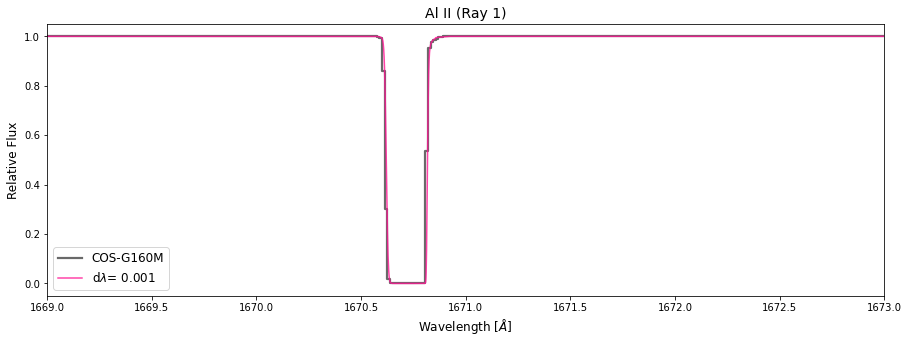

In [51]:
spec(ray1, 1669, 1673, line='Al II', ins='COS-G160M', dlam2=0.01223, num='1')

yt : [INFO     ] 2022-06-27 14:16:30,404 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:16:30,415 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:16:30,424 Creating Al_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:16:30,429 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 9314.45it/s]
yt : [INFO     ] 2022-06-27 14:16:30,501 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:16:30,526 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 14394.87it/s]
yt : [INFO     ] 2022-06-27 14:16:30,575 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype

[array([array([1669.   , 1669.001, 1669.002, ..., 1672.998, 1672.999, 1673.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1669.004, 1669.016, 1669.028, 1669.04 , 1669.053, 1669.065,
               1669.077, 1669.089, 1669.101, 1669.114, 1669.126, 1669.138,
               1669.15 , 1669.163, 1669.175, 1669.187, 1669.199, 1669.212,
               1669.224, 1669.236, 1669.248, 1669.26 , 1669.273, 1669.285,
               1669.297, 1669.309, 1669.322, 1669.334, 1669.346, 1669.358,
               1669.371, 1669.383, 1669.395, 1669.407, 1669.419, 1669.432,
               1669.444, 1669.456, 1669.468, 1669.481, 1669.493, 1669.505,
               1669.517, 1669.53 , 1669.542, 1669.554, 1669.566, 1669.578,
               1669.591, 1669.603, 1669.615, 1669.627, 1669.64 , 1669.652,
               1669.664, 1669.676, 1669.689, 1669.701, 1669.713, 1669.725,
               1669.737, 1669.75 , 1669.762, 1669.774, 1669.786, 1669.799,
               1669.811, 1669.823, 1669.835, 16

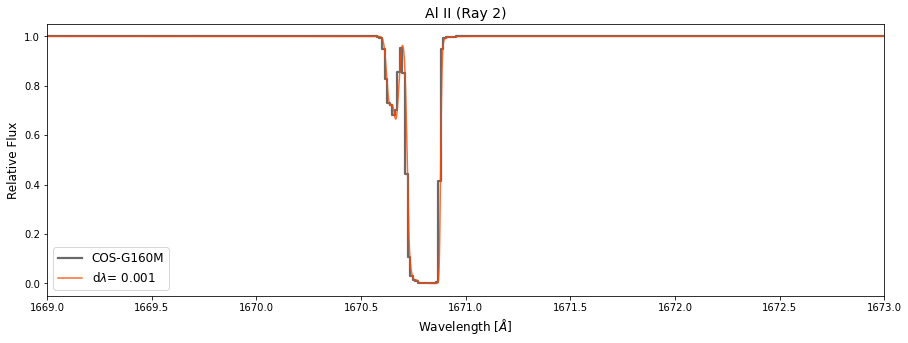

In [52]:
spec(ray2, 1669, 1673, line='Al II', ins='COS-G160M', dlam2=0.01223, num='2',col='orangered')

yt : [INFO     ] 2022-06-27 14:16:33,164 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:16:33,175 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:16:33,185 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 9232.28it/s]
yt : [INFO     ] 2022-06-27 14:16:33,255 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:16:33,263 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 15603.99it/s]
yt : [INFO     ] 2022-06-27 14:16:33,310 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tog = np.array([lam, flux, lam2, flux2])


[array([array([1670.5  , 1670.501, 1670.502, ..., 1671.498, 1671.499, 1671.5  ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1670.496, 1670.508, 1670.52 , 1670.532, 1670.545, 1670.557,
               1670.569, 1670.581, 1670.594, 1670.606, 1670.618, 1670.63 ,
               1670.642, 1670.655, 1670.667, 1670.679, 1670.691, 1670.704,
               1670.716, 1670.728, 1670.74 , 1670.753, 1670.765, 1670.777,
               1670.789, 1670.801, 1670.814, 1670.826, 1670.838, 1670.85 ,
               1670.863, 1670.875, 1670.887, 1670.899, 1670.912, 1670.924,
               1670.936, 1670.948, 1670.96 , 1670.973, 1670.985, 1670.997,
               1671.009, 1671.022, 1671.034, 1671.046, 1671.058, 1671.071,
               1671.083, 1671.095, 1671.107, 1671.119, 1671.132, 1671.144,
               1671.156, 1671.168, 1671.181, 1671.193, 1671.205, 1671.217,
               1671.229, 1671.242, 1671.254, 1671.266, 1671.278, 1671.291,
               1671.303, 1671.315, 1671.327, 16

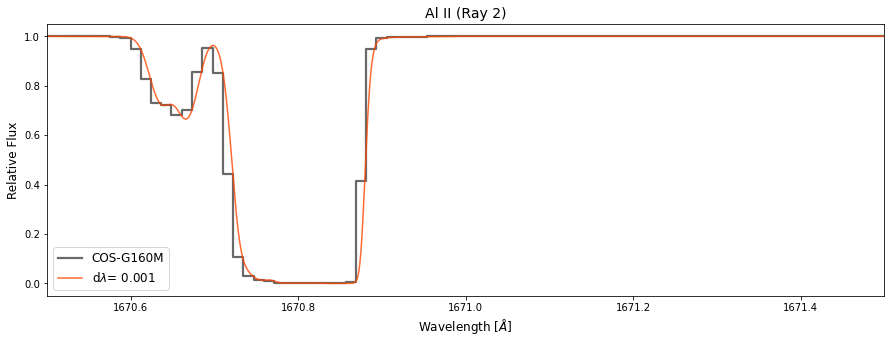

In [53]:
spec(ray2, 1670.5, 1671.5, line='Al II', ins='COS-G160M', dlam2=0.01223, num='2',col='orangered')

yt : [INFO     ] 2022-06-27 14:16:37,649 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:16:37,659 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:16:37,667 Creating Al_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:16:37,673 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 4485.32it/s]
yt : [INFO     ] 2022-06-27 14:16:37,772 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:16:37,797 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 8198.82it/s]
yt : [INFO     ] 2022-06-27 14:16:37,861 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=

[array([array([1669.   , 1669.001, 1669.002, ..., 1672.998, 1672.999, 1673.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1669.004, 1669.016, 1669.028, 1669.04 , 1669.053, 1669.065,
               1669.077, 1669.089, 1669.101, 1669.114, 1669.126, 1669.138,
               1669.15 , 1669.163, 1669.175, 1669.187, 1669.199, 1669.212,
               1669.224, 1669.236, 1669.248, 1669.26 , 1669.273, 1669.285,
               1669.297, 1669.309, 1669.322, 1669.334, 1669.346, 1669.358,
               1669.371, 1669.383, 1669.395, 1669.407, 1669.419, 1669.432,
               1669.444, 1669.456, 1669.468, 1669.481, 1669.493, 1669.505,
               1669.517, 1669.53 , 1669.542, 1669.554, 1669.566, 1669.578,
               1669.591, 1669.603, 1669.615, 1669.627, 1669.64 , 1669.652,
               1669.664, 1669.676, 1669.689, 1669.701, 1669.713, 1669.725,
               1669.737, 1669.75 , 1669.762, 1669.774, 1669.786, 1669.799,
               1669.811, 1669.823, 1669.835, 16

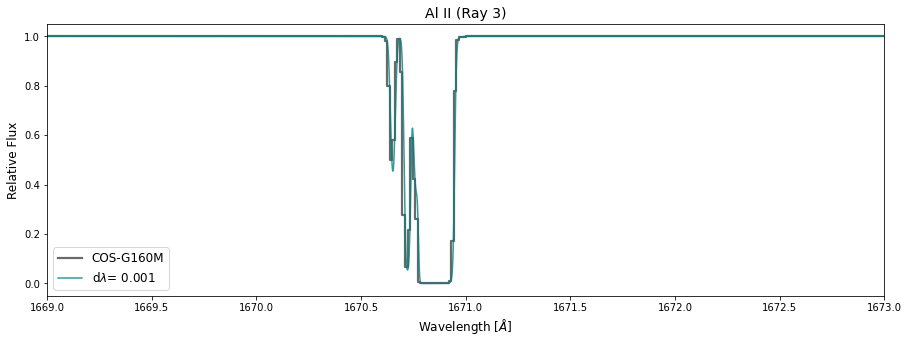

In [54]:
spec(ray3, 1669, 1673, line='Al II', ins='COS-G160M', dlam2=0.01223, num='3',col='teal')

# Al III 1854

yt : [INFO     ] 2022-06-27 14:16:48,136 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:16:48,150 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:16:48,159 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:16:48,188 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00:00<00:00, 3537.10it/s]
yt : [INFO     ] 2022-06-27 14:16:48,295 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:16:48,322 Creating spectrum
yt : [INFO     ] 2022-06-27 14:16:48,358 79 out of 256 line components will be deposited as unresolved lines.
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7822.51it/s]
yt : [INFO     ] 2022-06-27 14:16:48,392 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuple

[array([array([1852.5  , 1852.501, 1852.502, ..., 1856.498, 1856.499, 1856.5  ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1852.516, 1852.553, 1852.59 , 1852.627, 1852.664, 1852.701,
               1852.738, 1852.775, 1852.812, 1852.849, 1852.886, 1852.923,
               1852.96 , 1852.997, 1853.034, 1853.071, 1853.108, 1853.145,
               1853.182, 1853.219, 1853.256, 1853.293, 1853.33 , 1853.367,
               1853.404, 1853.441, 1853.478, 1853.515, 1853.552, 1853.589,
               1853.626, 1853.663, 1853.7  , 1853.737, 1853.774, 1853.811,
               1853.848, 1853.885, 1853.922, 1853.959, 1853.996, 1854.033,
               1854.07 , 1854.107, 1854.144, 1854.181, 1854.218, 1854.255,
               1854.292, 1854.329, 1854.366, 1854.403, 1854.44 , 1854.477,
               1854.514, 1854.551, 1854.588, 1854.625, 1854.662, 1854.699,
               1854.736, 1854.773, 1854.81 , 1854.847, 1854.884, 1854.921,
               1854.958, 1854.995, 1855.032, 18

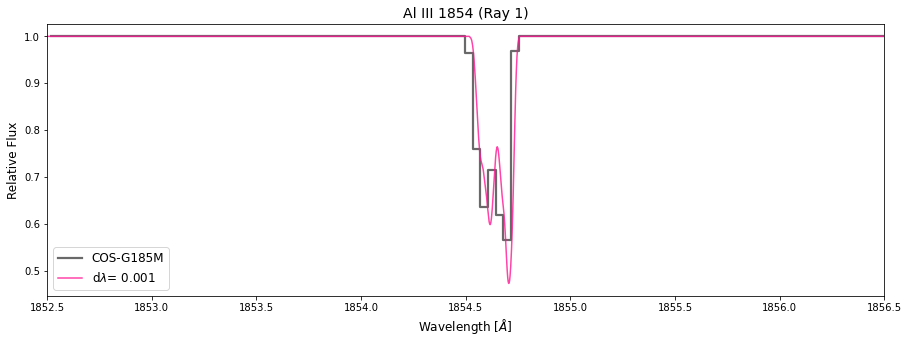

In [55]:
spec(ray1, 1852.5,1856.5,el='Al',rom_num='III',lrest=1854.72, 
     gamma=5.57E+08, f_value=5.75E-01, DIY=True, dlam2=0.037, ins='COS-G185M', num='1')

yt : [INFO     ] 2022-06-27 14:16:52,845 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:16:52,858 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:16:52,865 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:16:52,869 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00:00<00:00, 12158.64it/s]
yt : [INFO     ] 2022-06-27 14:16:52,929 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:16:52,955 Creating spectrum
yt : [INFO     ] 2022-06-27 14:16:52,986 14 out of 256 line components will be deposited as unresolved lines.
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00:00<00:00, 19654.44it/s]
yt : [INFO     ] 2022-06-27 14:16:53,001 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tup

[array([array([1852.5  , 1852.501, 1852.502, ..., 1856.498, 1856.499, 1856.5  ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1852.516, 1852.553, 1852.59 , 1852.627, 1852.664, 1852.701,
               1852.738, 1852.775, 1852.812, 1852.849, 1852.886, 1852.923,
               1852.96 , 1852.997, 1853.034, 1853.071, 1853.108, 1853.145,
               1853.182, 1853.219, 1853.256, 1853.293, 1853.33 , 1853.367,
               1853.404, 1853.441, 1853.478, 1853.515, 1853.552, 1853.589,
               1853.626, 1853.663, 1853.7  , 1853.737, 1853.774, 1853.811,
               1853.848, 1853.885, 1853.922, 1853.959, 1853.996, 1854.033,
               1854.07 , 1854.107, 1854.144, 1854.181, 1854.218, 1854.255,
               1854.292, 1854.329, 1854.366, 1854.403, 1854.44 , 1854.477,
               1854.514, 1854.551, 1854.588, 1854.625, 1854.662, 1854.699,
               1854.736, 1854.773, 1854.81 , 1854.847, 1854.884, 1854.921,
               1854.958, 1854.995, 1855.032, 18

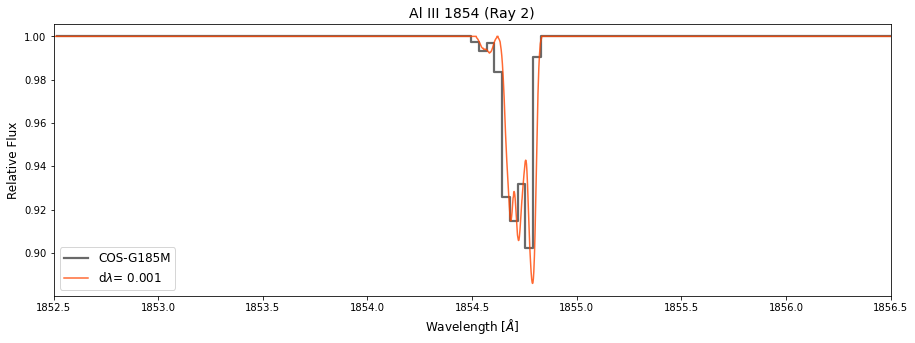

In [56]:
spec(ray2, 1852.5,1856.5,el='Al',rom_num='III',lrest=1854.72, 
     gamma=5.57E+08, f_value=5.75E-01, DIY=True, dlam2=0.037, ins='COS-G185M', num='2', col='orangered',
    dlam=0.001)

yt : [INFO     ] 2022-06-27 14:16:55,263 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:16:55,275 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:16:55,282 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:16:55,288 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5715.07it/s]
yt : [INFO     ] 2022-06-27 14:16:55,376 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:16:55,401 Creating spectrum
yt : [INFO     ] 2022-06-27 14:16:55,433 42 out of 256 line components will be deposited as unresolved lines.
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00:00<00:00, 11776.58it/s]
yt : [INFO     ] 2022-06-27 14:16:55,456 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tupl

[array([array([1852.5  , 1852.501, 1852.502, ..., 1856.498, 1856.499, 1856.5  ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1852.516, 1852.553, 1852.59 , 1852.627, 1852.664, 1852.701,
               1852.738, 1852.775, 1852.812, 1852.849, 1852.886, 1852.923,
               1852.96 , 1852.997, 1853.034, 1853.071, 1853.108, 1853.145,
               1853.182, 1853.219, 1853.256, 1853.293, 1853.33 , 1853.367,
               1853.404, 1853.441, 1853.478, 1853.515, 1853.552, 1853.589,
               1853.626, 1853.663, 1853.7  , 1853.737, 1853.774, 1853.811,
               1853.848, 1853.885, 1853.922, 1853.959, 1853.996, 1854.033,
               1854.07 , 1854.107, 1854.144, 1854.181, 1854.218, 1854.255,
               1854.292, 1854.329, 1854.366, 1854.403, 1854.44 , 1854.477,
               1854.514, 1854.551, 1854.588, 1854.625, 1854.662, 1854.699,
               1854.736, 1854.773, 1854.81 , 1854.847, 1854.884, 1854.921,
               1854.958, 1854.995, 1855.032, 18

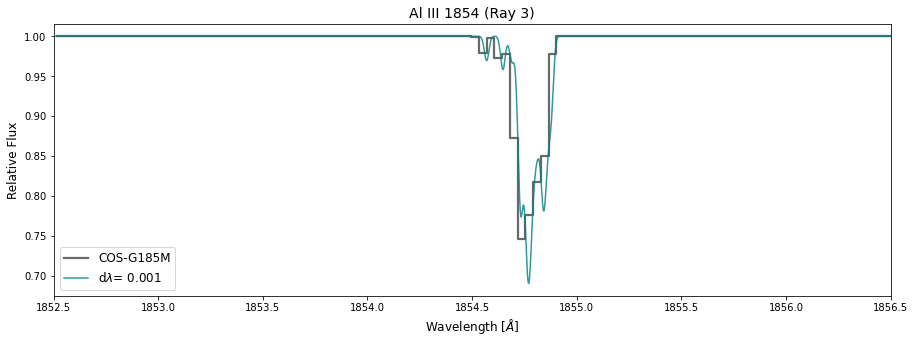

In [57]:
spec(ray3, 1852.5,1856.5,el='Al',rom_num='III',lrest=1854.72, 
     gamma=5.57E+08, f_value=5.75E-01, DIY=True, dlam2=0.037, ins='COS-G185M', num='3', col='teal')

# Fe II 2600

yt : [INFO     ] 2022-06-27 14:17:40,605 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:17:40,618 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:17:40,625 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2479.80it/s]
yt : [INFO     ] 2022-06-27 14:17:40,776 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:17:40,804 Creating spectrum
yt : [INFO     ] 2022-06-27 14:17:40,837 79 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7102.45it/s]
yt : [INFO     ] 2022-06-27 14:17:40,875 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object'

[array([array([2598.   , 2598.001, 2598.002, ..., 2601.998, 2601.999, 2602.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([2598.  , 2598.04, 2598.08, 2598.12, 2598.16, 2598.2 , 2598.24,
               2598.28, 2598.32, 2598.36, 2598.4 , 2598.44, 2598.48, 2598.52,
               2598.56, 2598.6 , 2598.64, 2598.68, 2598.72, 2598.76, 2598.8 ,
               2598.84, 2598.88, 2598.92, 2598.96, 2599.  , 2599.04, 2599.08,
               2599.12, 2599.16, 2599.2 , 2599.24, 2599.28, 2599.32, 2599.36,
               2599.4 , 2599.44, 2599.48, 2599.52, 2599.56, 2599.6 , 2599.64,
               2599.68, 2599.72, 2599.76, 2599.8 , 2599.84, 2599.88, 2599.92,
               2599.96, 2600.  , 2600.04, 2600.08, 2600.12, 2600.16, 2600.2 ,
               2600.24, 2600.28, 2600.32, 2600.36, 2600.4 , 2600.44, 2600.48,
               2600.52, 2600.56, 2600.6 , 2600.64, 2600.68, 2600.72, 2600.76,
               2600.8 , 2600.84, 2600.88, 2600.92, 2600.96, 2601.  , 2601.04,
              

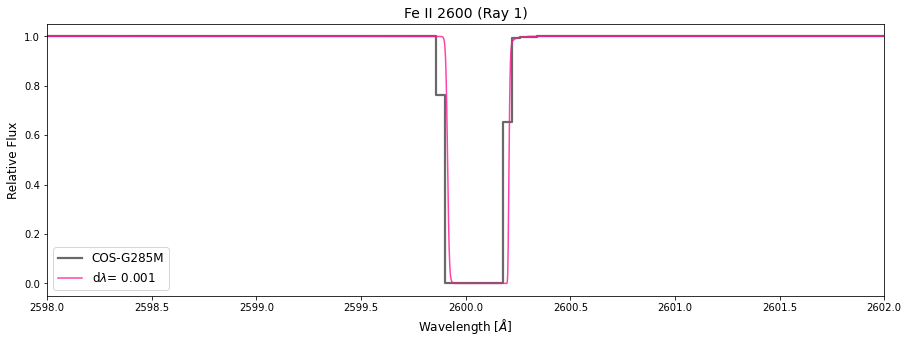

In [61]:
spec(ray1, 2598,2602,
    el='Fe', rom_num='II', lrest=2600.17, gamma=2.37E+08, f_value=2.4E-01, DIY=True,
    ins='COS-G285M', dlam2=0.04, num='1')

yt : [INFO     ] 2022-06-27 14:17:48,314 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:17:48,328 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:17:48,338 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9203.95it/s]
yt : [INFO     ] 2022-06-27 14:17:48,409 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:17:48,434 Creating spectrum
yt : [INFO     ] 2022-06-27 14:17:48,464 15 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00<00:00, 15601.04it/s]
yt : [INFO     ] 2022-06-27 14:17:48,482 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object

[array([array([2598.   , 2598.001, 2598.002, ..., 2601.998, 2601.999, 2602.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([2598.  , 2598.04, 2598.08, 2598.12, 2598.16, 2598.2 , 2598.24,
               2598.28, 2598.32, 2598.36, 2598.4 , 2598.44, 2598.48, 2598.52,
               2598.56, 2598.6 , 2598.64, 2598.68, 2598.72, 2598.76, 2598.8 ,
               2598.84, 2598.88, 2598.92, 2598.96, 2599.  , 2599.04, 2599.08,
               2599.12, 2599.16, 2599.2 , 2599.24, 2599.28, 2599.32, 2599.36,
               2599.4 , 2599.44, 2599.48, 2599.52, 2599.56, 2599.6 , 2599.64,
               2599.68, 2599.72, 2599.76, 2599.8 , 2599.84, 2599.88, 2599.92,
               2599.96, 2600.  , 2600.04, 2600.08, 2600.12, 2600.16, 2600.2 ,
               2600.24, 2600.28, 2600.32, 2600.36, 2600.4 , 2600.44, 2600.48,
               2600.52, 2600.56, 2600.6 , 2600.64, 2600.68, 2600.72, 2600.76,
               2600.8 , 2600.84, 2600.88, 2600.92, 2600.96, 2601.  , 2601.04,
              

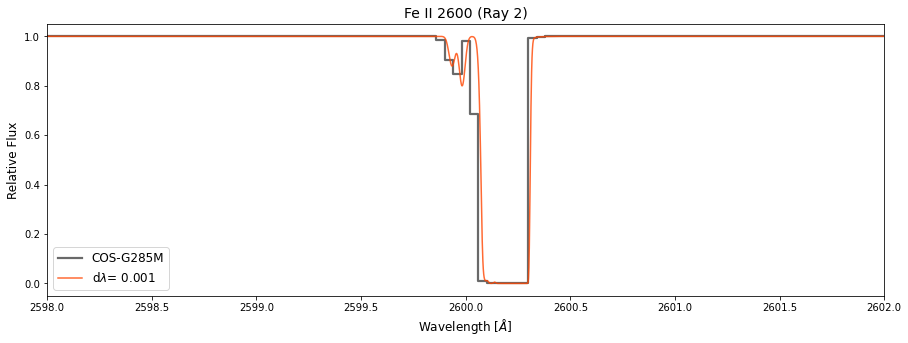

In [62]:
spec(ray2, 2598,2602,
    el='Fe', rom_num='II', lrest=2600.17, gamma=2.37E+08, f_value=2.4E-01, DIY=True,
    ins='COS-G285M', dlam2=0.04, num='2', col='orangered')

yt : [INFO     ] 2022-06-27 14:17:56,433 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:17:56,444 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:17:56,454 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4444.66it/s]
yt : [INFO     ] 2022-06-27 14:17:56,557 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:17:56,582 Creating spectrum
yt : [INFO     ] 2022-06-27 14:17:56,613 42 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10324.64it/s]
yt : [INFO     ] 2022-06-27 14:17:56,640 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object

[array([array([2598.   , 2598.001, 2598.002, ..., 2601.998, 2601.999, 2602.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([2598.  , 2598.04, 2598.08, 2598.12, 2598.16, 2598.2 , 2598.24,
               2598.28, 2598.32, 2598.36, 2598.4 , 2598.44, 2598.48, 2598.52,
               2598.56, 2598.6 , 2598.64, 2598.68, 2598.72, 2598.76, 2598.8 ,
               2598.84, 2598.88, 2598.92, 2598.96, 2599.  , 2599.04, 2599.08,
               2599.12, 2599.16, 2599.2 , 2599.24, 2599.28, 2599.32, 2599.36,
               2599.4 , 2599.44, 2599.48, 2599.52, 2599.56, 2599.6 , 2599.64,
               2599.68, 2599.72, 2599.76, 2599.8 , 2599.84, 2599.88, 2599.92,
               2599.96, 2600.  , 2600.04, 2600.08, 2600.12, 2600.16, 2600.2 ,
               2600.24, 2600.28, 2600.32, 2600.36, 2600.4 , 2600.44, 2600.48,
               2600.52, 2600.56, 2600.6 , 2600.64, 2600.68, 2600.72, 2600.76,
               2600.8 , 2600.84, 2600.88, 2600.92, 2600.96, 2601.  , 2601.04,
              

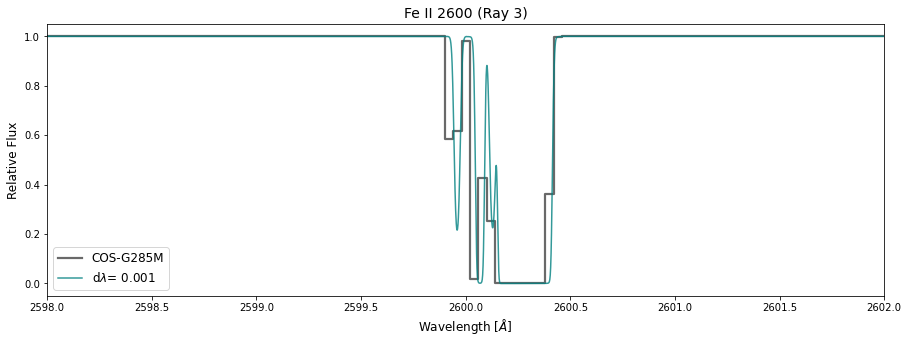

In [63]:
spec(ray3, 2598,2602,
    el='Fe', rom_num='II', lrest=2600.17, gamma=2.37E+08, f_value=2.4E-01, DIY=True,
    ins='COS-G285M', dlam2=0.04, num='3', col='teal')

# Fe III 1122

yt : [INFO     ] 2022-06-27 14:18:11,597 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:18:11,607 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:18:11,616 Creating Fe_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:18:11,667 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 3697.81it/s]
yt : [INFO     ] 2022-06-27 14:18:11,768 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:18:11,795 Creating spectrum
yt : [INFO     ] 2022-06-27 14:18:11,829 79 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 6595.10it/s]
yt : [INFO     ] 2022-06-27 14:18:11,869 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuple

[array([array([1121.   , 1121.001, 1121.002, ..., 1124.998, 1124.999, 1125.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1120.997, 1121.007, 1121.017, 1121.027, 1121.037, 1121.047,
               1121.057, 1121.067, 1121.077, 1121.087, 1121.097, 1121.107,
               1121.117, 1121.126, 1121.136, 1121.146, 1121.156, 1121.166,
               1121.176, 1121.186, 1121.196, 1121.206, 1121.216, 1121.226,
               1121.236, 1121.246, 1121.256, 1121.266, 1121.276, 1121.286,
               1121.296, 1121.306, 1121.316, 1121.326, 1121.336, 1121.346,
               1121.356, 1121.366, 1121.376, 1121.386, 1121.396, 1121.406,
               1121.416, 1121.426, 1121.436, 1121.446, 1121.456, 1121.465,
               1121.475, 1121.485, 1121.495, 1121.505, 1121.515, 1121.525,
               1121.535, 1121.545, 1121.555, 1121.565, 1121.575, 1121.585,
               1121.595, 1121.605, 1121.615, 1121.625, 1121.635, 1121.645,
               1121.655, 1121.665, 1121.675, 11

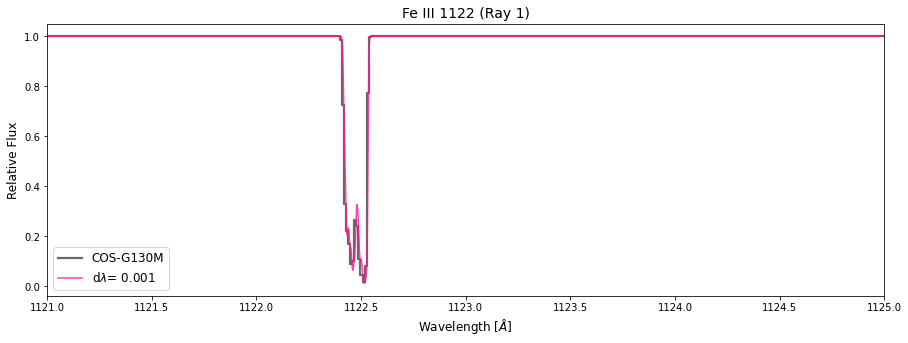

In [64]:
spec(ray1, 1121,1125,
    el='Fe', rom_num='III', lrest=1122.5241, gamma=5.42E+08, f_value=7.97E-02, DIY=True,
    ins='COS-G130M', dlam2=0.00997, num='1')

yt : [INFO     ] 2022-06-27 14:18:14,194 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:18:14,207 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:18:14,215 Creating Fe_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:18:14,220 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 10441.81it/s]
yt : [INFO     ] 2022-06-27 14:18:14,287 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:18:14,313 Creating spectrum
yt : [INFO     ] 2022-06-27 14:18:14,343 14 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 14490.25it/s]
yt : [INFO     ] 2022-06-27 14:18:14,363 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tup

[array([array([1121.   , 1121.001, 1121.002, ..., 1124.998, 1124.999, 1125.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1120.997, 1121.007, 1121.017, 1121.027, 1121.037, 1121.047,
               1121.057, 1121.067, 1121.077, 1121.087, 1121.097, 1121.107,
               1121.117, 1121.126, 1121.136, 1121.146, 1121.156, 1121.166,
               1121.176, 1121.186, 1121.196, 1121.206, 1121.216, 1121.226,
               1121.236, 1121.246, 1121.256, 1121.266, 1121.276, 1121.286,
               1121.296, 1121.306, 1121.316, 1121.326, 1121.336, 1121.346,
               1121.356, 1121.366, 1121.376, 1121.386, 1121.396, 1121.406,
               1121.416, 1121.426, 1121.436, 1121.446, 1121.456, 1121.465,
               1121.475, 1121.485, 1121.495, 1121.505, 1121.515, 1121.525,
               1121.535, 1121.545, 1121.555, 1121.565, 1121.575, 1121.585,
               1121.595, 1121.605, 1121.615, 1121.625, 1121.635, 1121.645,
               1121.655, 1121.665, 1121.675, 11

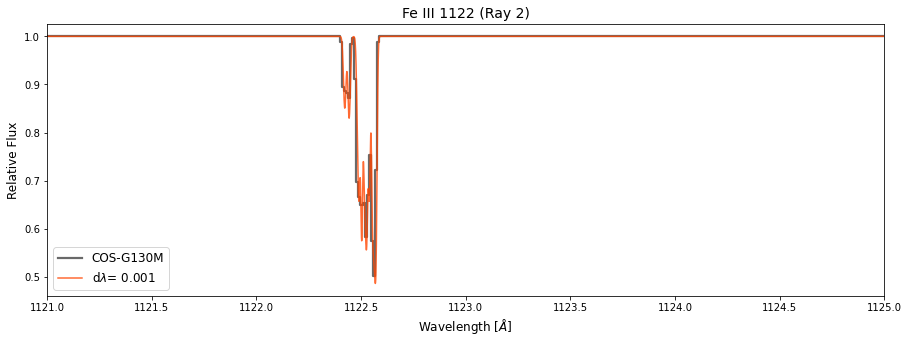

In [65]:
spec(ray2, 1121,1125,
    el='Fe', rom_num='III', lrest=1122.5241, gamma=5.42E+08, f_value=7.97E-02, DIY=True,
    ins='COS-G130M', dlam2=0.00997, num='2', col='orangered')

yt : [INFO     ] 2022-06-27 14:18:16,702 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:18:16,713 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:18:16,721 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 10564.58it/s]
yt : [INFO     ] 2022-06-27 14:18:16,788 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:18:16,795 Creating spectrum
yt : [INFO     ] 2022-06-27 14:18:16,825 14 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 14886.41it/s]
yt : [INFO     ] 2022-06-27 14:18:16,844 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=obj

[array([array([1122.   , 1122.001, 1122.002, ..., 1122.998, 1122.999, 1123.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1122.004, 1122.014, 1122.024, 1122.034, 1122.044, 1122.054,
               1122.064, 1122.074, 1122.084, 1122.094, 1122.104, 1122.114,
               1122.123, 1122.133, 1122.143, 1122.153, 1122.163, 1122.173,
               1122.183, 1122.193, 1122.203, 1122.213, 1122.223, 1122.233,
               1122.243, 1122.253, 1122.263, 1122.273, 1122.283, 1122.293,
               1122.303, 1122.313, 1122.323, 1122.333, 1122.343, 1122.353,
               1122.363, 1122.373, 1122.383, 1122.393, 1122.403, 1122.413,
               1122.423, 1122.433, 1122.443, 1122.453, 1122.462, 1122.472,
               1122.482, 1122.492, 1122.502, 1122.512, 1122.522, 1122.532,
               1122.542, 1122.552, 1122.562, 1122.572, 1122.582, 1122.592,
               1122.602, 1122.612, 1122.622, 1122.632, 1122.642, 1122.652,
               1122.662, 1122.672, 1122.682, 11

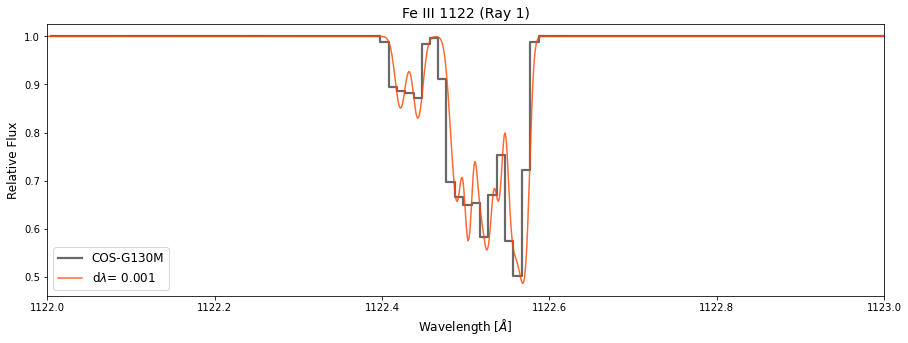

In [66]:
spec(ray2, 1122,1123,
    el='Fe', rom_num='III', lrest=1122.5241, gamma=5.42E+08, f_value=7.97E-02, DIY=True,
    ins='COS-G130M', dlam2=0.00997, num='1', col='orangered')

yt : [INFO     ] 2022-06-27 14:18:19,670 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:18:19,680 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:18:19,689 Creating Fe_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:18:19,695 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 5786.99it/s]
yt : [INFO     ] 2022-06-27 14:18:19,782 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:18:19,808 Creating spectrum
yt : [INFO     ] 2022-06-27 14:18:19,841 40 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 9194.18it/s]
yt : [INFO     ] 2022-06-27 14:18:19,871 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuple

[array([array([1121.   , 1121.001, 1121.002, ..., 1124.998, 1124.999, 1125.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1120.997, 1121.007, 1121.017, 1121.027, 1121.037, 1121.047,
               1121.057, 1121.067, 1121.077, 1121.087, 1121.097, 1121.107,
               1121.117, 1121.126, 1121.136, 1121.146, 1121.156, 1121.166,
               1121.176, 1121.186, 1121.196, 1121.206, 1121.216, 1121.226,
               1121.236, 1121.246, 1121.256, 1121.266, 1121.276, 1121.286,
               1121.296, 1121.306, 1121.316, 1121.326, 1121.336, 1121.346,
               1121.356, 1121.366, 1121.376, 1121.386, 1121.396, 1121.406,
               1121.416, 1121.426, 1121.436, 1121.446, 1121.456, 1121.465,
               1121.475, 1121.485, 1121.495, 1121.505, 1121.515, 1121.525,
               1121.535, 1121.545, 1121.555, 1121.565, 1121.575, 1121.585,
               1121.595, 1121.605, 1121.615, 1121.625, 1121.635, 1121.645,
               1121.655, 1121.665, 1121.675, 11

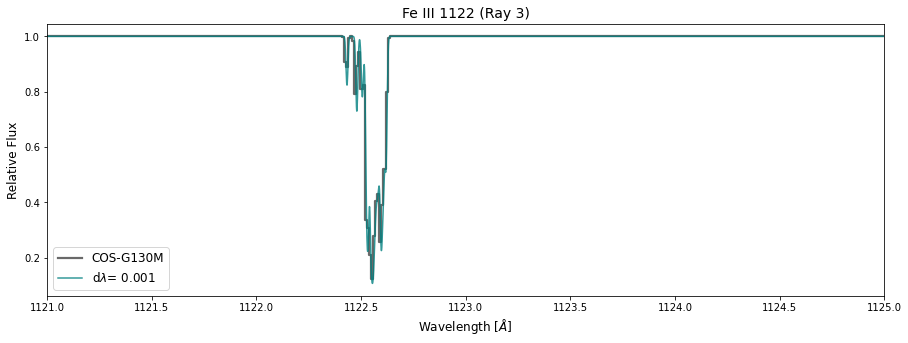

In [67]:
spec(ray3, 1121,1125,
    el='Fe', rom_num='III', lrest=1122.5241, gamma=5.42E+08, f_value=7.97E-02, DIY=True,
    ins='COS-G130M', dlam2=0.00997, num='3', col='teal')

yt : [INFO     ] 2022-06-27 14:20:11,957 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:20:11,970 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:20:11,979 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 5726.56it/s]
yt : [INFO     ] 2022-06-27 14:20:12,073 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:20:12,081 Creating spectrum
yt : [INFO     ] 2022-06-27 14:20:12,109 40 out of 256 line components will be deposited as unresolved lines.
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 9547.68it/s]
yt : [INFO     ] 2022-06-27 14:20:12,138 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=objec

[array([array([1122.   , 1122.001, 1122.002, ..., 1122.998, 1122.999, 1123.   ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([1122.004, 1122.014, 1122.024, 1122.034, 1122.044, 1122.054,
               1122.064, 1122.074, 1122.084, 1122.094, 1122.104, 1122.114,
               1122.123, 1122.133, 1122.143, 1122.153, 1122.163, 1122.173,
               1122.183, 1122.193, 1122.203, 1122.213, 1122.223, 1122.233,
               1122.243, 1122.253, 1122.263, 1122.273, 1122.283, 1122.293,
               1122.303, 1122.313, 1122.323, 1122.333, 1122.343, 1122.353,
               1122.363, 1122.373, 1122.383, 1122.393, 1122.403, 1122.413,
               1122.423, 1122.433, 1122.443, 1122.453, 1122.462, 1122.472,
               1122.482, 1122.492, 1122.502, 1122.512, 1122.522, 1122.532,
               1122.542, 1122.552, 1122.562, 1122.572, 1122.582, 1122.592,
               1122.602, 1122.612, 1122.622, 1122.632, 1122.642, 1122.652,
               1122.662, 1122.672, 1122.682, 11

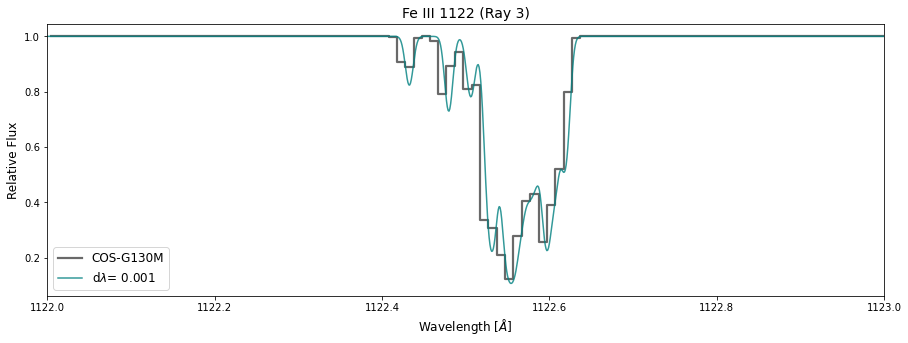

In [76]:
spec(ray3, 1122,1123,
    el='Fe', rom_num='III', lrest=1122.5241, gamma=5.42E+08, f_value=7.97E-02, DIY=True,
    ins='COS-G130M', dlam2=0.00997, num='3', col='teal')

# Mg II 2796

yt : [INFO     ] 2022-06-27 14:19:32,952 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:19:32,965 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:19:32,973 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<00:00, 1809.25it/s]
yt : [INFO     ] 2022-06-27 14:19:33,159 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:19:33,185 Creating spectrum
yt : [INFO     ] 2022-06-27 14:19:33,213 79 out of 256 line components will be deposited as unresolved lines.
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5457.00it/s]
yt : [INFO     ] 2022-06-27 14:19:33,261 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object'

[array([array([2794.5  , 2794.501, 2794.502, ..., 2798.498, 2798.499, 2798.5  ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([2794.48, 2794.52, 2794.56, 2794.6 , 2794.64, 2794.68, 2794.72,
               2794.76, 2794.8 , 2794.84, 2794.88, 2794.92, 2794.96, 2795.  ,
               2795.04, 2795.08, 2795.12, 2795.16, 2795.2 , 2795.24, 2795.28,
               2795.32, 2795.36, 2795.4 , 2795.44, 2795.48, 2795.52, 2795.56,
               2795.6 , 2795.64, 2795.68, 2795.72, 2795.76, 2795.8 , 2795.84,
               2795.88, 2795.92, 2795.96, 2796.  , 2796.04, 2796.08, 2796.12,
               2796.16, 2796.2 , 2796.24, 2796.28, 2796.32, 2796.36, 2796.4 ,
               2796.44, 2796.48, 2796.52, 2796.56, 2796.6 , 2796.64, 2796.68,
               2796.72, 2796.76, 2796.8 , 2796.84, 2796.88, 2796.92, 2796.96,
               2797.  , 2797.04, 2797.08, 2797.12, 2797.16, 2797.2 , 2797.24,
               2797.28, 2797.32, 2797.36, 2797.4 , 2797.44, 2797.48, 2797.52,
              

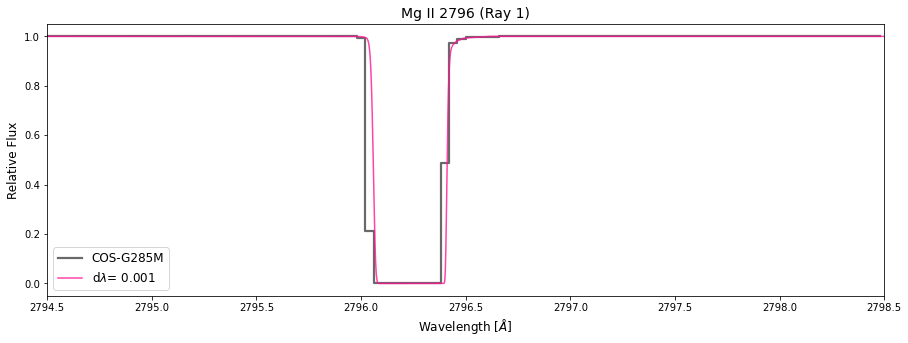

In [73]:
spec(ray1, 2794.5,2798.5, 
     el='Mg', rom_num='II', lrest=2796.35, gamma=2.68E+08, f_value=6.29E-01, DIY=True,
    ins='COS-G285M', dlam2=0.04, num='1')

yt : [INFO     ] 2022-06-27 14:19:38,451 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:19:38,462 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:19:38,472 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7022.56it/s]
yt : [INFO     ] 2022-06-27 14:19:38,552 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:19:38,578 Creating spectrum
yt : [INFO     ] 2022-06-27 14:19:38,611 14 out of 256 line components will be deposited as unresolved lines.
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<00:00, 13791.56it/s]
yt : [INFO     ] 2022-06-27 14:19:38,631 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object

[array([array([2794.5  , 2794.501, 2794.502, ..., 2798.498, 2798.499, 2798.5  ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([2794.48, 2794.52, 2794.56, 2794.6 , 2794.64, 2794.68, 2794.72,
               2794.76, 2794.8 , 2794.84, 2794.88, 2794.92, 2794.96, 2795.  ,
               2795.04, 2795.08, 2795.12, 2795.16, 2795.2 , 2795.24, 2795.28,
               2795.32, 2795.36, 2795.4 , 2795.44, 2795.48, 2795.52, 2795.56,
               2795.6 , 2795.64, 2795.68, 2795.72, 2795.76, 2795.8 , 2795.84,
               2795.88, 2795.92, 2795.96, 2796.  , 2796.04, 2796.08, 2796.12,
               2796.16, 2796.2 , 2796.24, 2796.28, 2796.32, 2796.36, 2796.4 ,
               2796.44, 2796.48, 2796.52, 2796.56, 2796.6 , 2796.64, 2796.68,
               2796.72, 2796.76, 2796.8 , 2796.84, 2796.88, 2796.92, 2796.96,
               2797.  , 2797.04, 2797.08, 2797.12, 2797.16, 2797.2 , 2797.24,
               2797.28, 2797.32, 2797.36, 2797.4 , 2797.44, 2797.48, 2797.52,
              

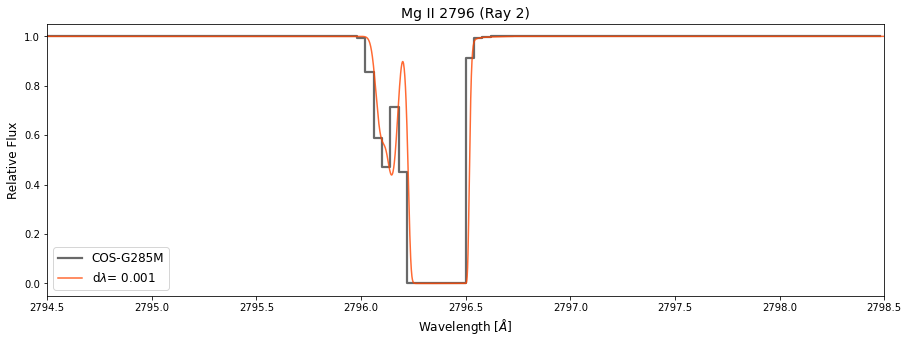

In [74]:
spec(ray2, 2794.5,2798.5, 
     el='Mg', rom_num='II', lrest=2796.35, gamma=2.68E+08, f_value=6.29E-01, DIY=True,
    ins='COS-G285M', dlam2=0.04, num='2', col='orangered')

yt : [INFO     ] 2022-06-27 14:19:46,700 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:19:46,711 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 14:19:46,719 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 14:19:46,725 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<00:00, 3255.63it/s]
yt : [INFO     ] 2022-06-27 14:19:46,848 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 14:19:46,875 Creating spectrum
yt : [INFO     ] 2022-06-27 14:19:46,908 41 out of 256 line components will be deposited as unresolved lines.
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<00:00, 8854.80it/s]
yt : [INFO     ] 2022-06-27 14:19:46,938 Writing spectrum to ascii file: spec2.txt.
<ipython-input-4-f55482f3cbf5>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-

[array([array([2794.5  , 2794.501, 2794.502, ..., 2798.498, 2798.499, 2798.5  ]),
        array([1., 1., 1., ..., 1., 1., 1.]),
        array([2794.48, 2794.52, 2794.56, 2794.6 , 2794.64, 2794.68, 2794.72,
               2794.76, 2794.8 , 2794.84, 2794.88, 2794.92, 2794.96, 2795.  ,
               2795.04, 2795.08, 2795.12, 2795.16, 2795.2 , 2795.24, 2795.28,
               2795.32, 2795.36, 2795.4 , 2795.44, 2795.48, 2795.52, 2795.56,
               2795.6 , 2795.64, 2795.68, 2795.72, 2795.76, 2795.8 , 2795.84,
               2795.88, 2795.92, 2795.96, 2796.  , 2796.04, 2796.08, 2796.12,
               2796.16, 2796.2 , 2796.24, 2796.28, 2796.32, 2796.36, 2796.4 ,
               2796.44, 2796.48, 2796.52, 2796.56, 2796.6 , 2796.64, 2796.68,
               2796.72, 2796.76, 2796.8 , 2796.84, 2796.88, 2796.92, 2796.96,
               2797.  , 2797.04, 2797.08, 2797.12, 2797.16, 2797.2 , 2797.24,
               2797.28, 2797.32, 2797.36, 2797.4 , 2797.44, 2797.48, 2797.52,
              

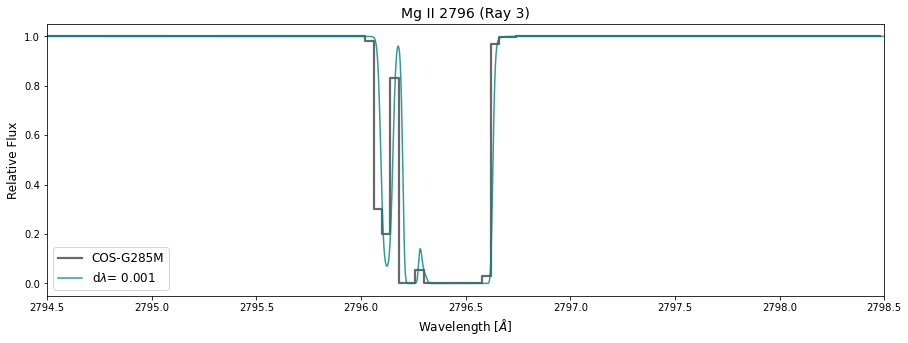

In [75]:
spec(ray3, 2794.5,2798.5, 
     el='Mg', rom_num='II', lrest=2796.35, gamma=2.68E+08, f_value=6.29E-01, DIY=True,
    ins='COS-G285M', dlam2=0.04, num='3', col='teal')